In [1]:
import numpy as np
import matplotlib.pyplot as plt
import arrow
import datetime
import xarray as xr
import os
import cmocean.cm as cm
import matplotlib.cm as cma
import scipy.interpolate as interp
from matplotlib.collections import PatchCollection
import matplotlib.dates as mpl_dates
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
import datetime as dt 
from matplotlib.patches import Rectangle
from IPython.display import Image, display
import pandas as pd

#### Functions

In [60]:
def draw_patches(fmask, ll, ul, u_lons, w_depths,m2lon,back=False):
    topo = []
    if back == False: 
        for i in range(ll, ul+1):
            for j in range(39):
                if (fmask[j, i]== 0):
                    try:
                        rect = Rectangle((u_lons[i-1]/m2lon, w_depths[j]), u_lons[i]/m2lon-u_lons[i-1]/m2lon, w_depths[j+1]-w_depths[j])
                        topo.append(rect)
                    except:
                        pass
    else:
         for i in range(ll, ul+2):
            for j in range(39):
                if (fmask[j, i]== 0):
                    try:
                        rect = Rectangle((u_lons[i-2]/m2lon, w_depths[j]), u_lons[i-1]/m2lon-u_lons[i-2]/m2lon, w_depths[j+1]-w_depths[j])
                        topo.append(rect)
                    except:
                        pass         
    pc = PatchCollection(topo, facecolors='lightgray', edgecolors='none')
    return(pc)

#TODO: Rename this function (in all files)
def plotCS(axv,lonsec,zsec,transpsec,lonW,lonE,latgridi,depi,vmax,time,title,cblabel,ylabel,NW=False,back=False):
    
    if NW == True:
        latgridf = latgridi-1 #actually lon
        fmask = mesh.fmask[0,:,:,latgridf] # Giving mask of longitudes
        tmask = mesh.tmask[0]
        
        lons = data.init_lat[(data.final_section != 0)]
        
        f_lons = mesh.glamf[0,:, latgridf]
        u_lons = mesh.glamv[0,:, latgridf]
        w_depths = mesh.gdepw_1d
    else:
        latgridf = latgridi-1
        fmask = mesh.vmask[0, :, latgridf]
        tmask = mesh.tmask[0]
            
        lons = data.init_lon[(data.final_section != 0)]
            
        f_lons = mesh.glamf[0, latgridf]
        u_lons = mesh.glamv[0, latgridf]
        w_depths = mesh.gdepw_1d

    m2lon = ((u_lons[lonE]-u_lons[lonW])/(mesh.e2f[0, latgridi, lonW:lonE].sum())).values #degrees/m
    
    cmap = cm.dense
    
    arr,xe,ye,im = axv.hist2d(lonsec/m2lon,df(zsec-1)[0],weights=transpsec,cmap=cmap,bins=[np.array(f_lons[lonW:lonE+1:1]/m2lon),w_depths[0,0:depi+1]],
                              density=True,vmax=vmax
                                )
    
    X,Y = np.meshgrid(xe,ye)
    
    try:
        im = axv.pcolormesh(X,Y,arr.T*np.sum(transpsec/time).values,cmap=cmap,vmax=vmax)
    except:
        im = axv.pcolormesh(X,Y,arr.T*np.sum(transpsec/time),cmap=cmap,vmax=vmax)
    
    axv.invert_yaxis()
    axv.set_title(title)
    if NW==True:
        axv.set_xlabel('Latitude (°N)')
    else:
        axv.set_xlabel('Longitude (°E)')
    axv.set_xticks(np.linspace(f_lons[lonW+2]/m2lon,f_lons[lonE-2]/m2lon,2))
    axv.xaxis.set_major_formatter(FormatStrFormatter(f"%.{2}f"))
    axv.set_xticklabels(['{:.2f}'.format(label) for label in np.linspace(f_lons[lonW+2],f_lons[lonE-2],2)])
    axv.set_xticklabels(np.round(np.linspace(f_lons[lonW+2],f_lons[lonE-2],2),2))
    
    pc = draw_patches(fmask, lonW, lonE, np.array(f_lons), np.array(w_depths[0]),m2lon,back)
    axv.add_collection(pc)

    if cblabel == True:
        cb = fig.colorbar(im,ax=axv)
        cb.set_label('Transport (m/s) \n')
    
    if ylabel == True:
        axv.set_ylabel('Depth (m)')
        
    else: 
        axv.set_yticklabels([])

In [3]:
def plotCS2(axv,lonsec,zsec,transpsec,lonW,lonE,latgridi,depi,vmax,time,title,cblabel,ylabel,NW=False,cfig=False):
    
    if NW == True:
        latgridf = latgridi-1 #actually lon
        fmask = mesh.fmask[0,:,:,latgridf] # Giving mask of longitudes
        tmask = mesh.tmask[0]
        
        lons = data.init_lat[(data.final_section != 0)]
        
        f_lons = mesh.gphif[0,:, latgridf]
        u_lons = mesh.gphiv[0,:, latgridf]
        w_depths = mesh.gdepw_1d
    else:
        latgridf = latgridi-1
        fmask = mesh.vmask[0, :, latgridf]
        tmask = mesh.tmask[0]
            
        lons = data.init_lon[(data.final_section != 0)]
            
        f_lons = mesh.glamf[0, latgridf]
        u_lons = mesh.glamv[0, latgridf]
        w_depths = mesh.gdepw_1d

    m2lon = ((u_lons[lonE]-u_lons[lonW])/(mesh.e2f[0, latgridi, lonW:lonE].sum())).values #degrees/m
    
    cmap = cm.dense
    
    arr,xe,ye,im = axv.hist2d(lonsec/m2lon,df(zsec-1)[0],weights=transpsec,cmap=cmap,bins=[np.array(f_lons[lonW:lonE+1:1]/m2lon),w_depths[0,0:depi+1]],
                              density=True,vmax=vmax
                                )
    
    X,Y = np.meshgrid(xe,ye)
    
    try:
        im = axv.pcolormesh(X,Y,arr.T*np.sum(transpsec/time).values,cmap=cmap,vmax=vmax)
    except:
        im = axv.pcolormesh(X,Y,arr.T*np.sum(transpsec/time),cmap=cmap,vmax=vmax)
    
    axv.invert_yaxis()
    axv.set_title(title)
    axv.set_xlabel('Latitude (°W)')
    axv.set_xticks(np.linspace(f_lons[lonW+2]/m2lon,f_lons[lonE-2]/m2lon,2))
    axv.xaxis.set_major_formatter(FormatStrFormatter(f"%.{2}f"))
    axv.set_xticklabels(['{:.2f}'.format(label) for label in np.linspace(f_lons[lonW+2],f_lons[lonE-2],2)])
    axv.set_xticklabels(np.round(np.linspace(f_lons[lonW+2],f_lons[lonE-2],2),2))

    if cblabel == True:
        if cfig == True:
            plt.colorbar()
        else:
            cb = fig.colorbar(im,ax=axv)
            cb.set_label('Transport (m/s)')
        
    
    if ylabel == True:
        axv.set_ylabel('Depth (m)')
        
    else: 
        axv.set_yticklabels([])

### Import data

In [4]:
data = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/Ariane/for_jan18/for_straight_01jan18_s7t28/ariane_positions_quantitative.nc')
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
df = interp.interp1d(mesh.z,mesh.gdepw_1d) # Interpolate to get same binning scheme as SalishSeaCast

In [5]:
file1 = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/combined_from_ariane/prtoadm_haro_finalsalt.csv')
file2 = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/combined_from_ariane/prtoadm_haro_finaltransp.csv')


pathway = ['vstoharo','vstoros','vstosjc','vstoadm','prtoharo','prtoros','prtosjc','prtogulf','harotovs','rostovs','sjctovs','admtovs','gulftoros','harotoros','sjctoros','prtoros_RS',
           'rostoadm','rostovs_RS','rostoharo','rostosjc','rostodec','vstoharo3','vstoros3','vstosjc3','vstoadm3','harotovs3','rostovs3',
           'sjctovs3','admtovs3','rostoadm3','rostovs3_RS','rostoharo3','rostosjc3','rostodec3']
variables = ['final_salt','final_transp','init_salt','init_transp','init_temp','final_lat','final_lon','init_lat','init_lon','init_z','final_z']
dict_all = {}
for pathw in pathway:
    dict_all[pathw] = {}
    for variable in variables:
        fpath = f'/ocean/cstang/MOAD/analysis-camryn/combined_from_ariane/{pathw}_{variable}.csv'
        dict_all[pathw][variable] = pd.read_csv(fpath)


In [6]:
dict_all.keys()

dict_keys(['vstoharo', 'vstoros', 'vstosjc', 'vstoadm', 'prtoharo', 'prtoros', 'prtosjc', 'prtogulf', 'harotovs', 'rostovs', 'sjctovs', 'admtovs', 'gulftoros', 'harotoros', 'sjctoros', 'prtoros_RS', 'rostoadm', 'rostovs_RS', 'rostoharo', 'rostosjc', 'rostodec', 'vstoharo3', 'vstoros3', 'vstosjc3', 'vstoadm3', 'harotovs3', 'rostovs3', 'sjctovs3', 'admtovs3', 'rostoadm3', 'rostovs3_RS', 'rostoharo3', 'rostosjc3', 'rostodec3'])

In [7]:
lonWharo = 215
lonEharo = 244
latharo = 300
lonWros=281
lonEros=305
latros = 267
latsjc = 281
lonWsjc = 261
lonEsjc = 267
lonWadm = 230
lonEadm = 262
latadm = 218
lonWg1 = 234
lonEg1 = 253
latg1 = 386
lonWpr = 260
lonEpr = 310
latpr = 386

months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

days_month = [31,28,31,30,31,30,31,31,30,31,30,31]

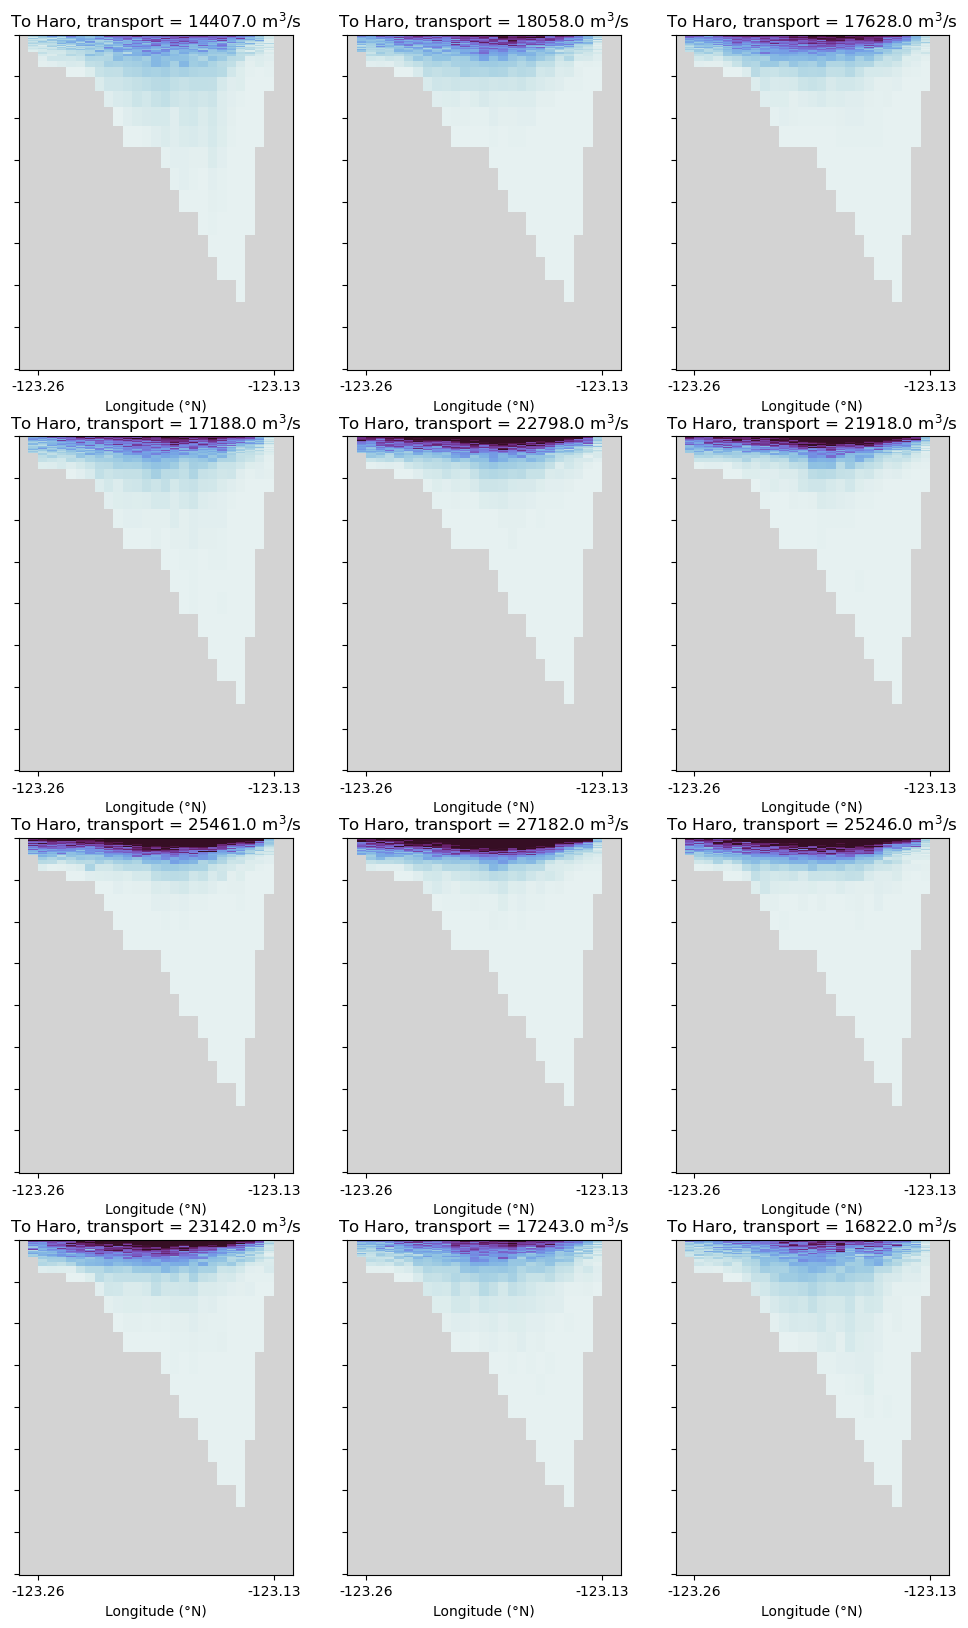

In [8]:
fig,[[ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9],[ax10,ax11,ax12]] = plt.subplots(4,3,figsize=(12,20))

for ii,ax in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]):
    title = 'To Haro, transport = ' + str(np.round(np.sum(dict_all['prtoharo']['final_transp'][months[ii]])/(23*days_month[ii]))) + f' m$^3$/s'
    plotCS(ax,dict_all['prtoharo']['final_lon'][months[ii]].dropna(),dict_all['prtoharo']['final_z'][months[ii]].dropna(),dict_all['prtoharo']['final_transp'][months[ii]].dropna(),lonWharo,lonEharo,latharo,38,0.1,23*30,title,False,False)

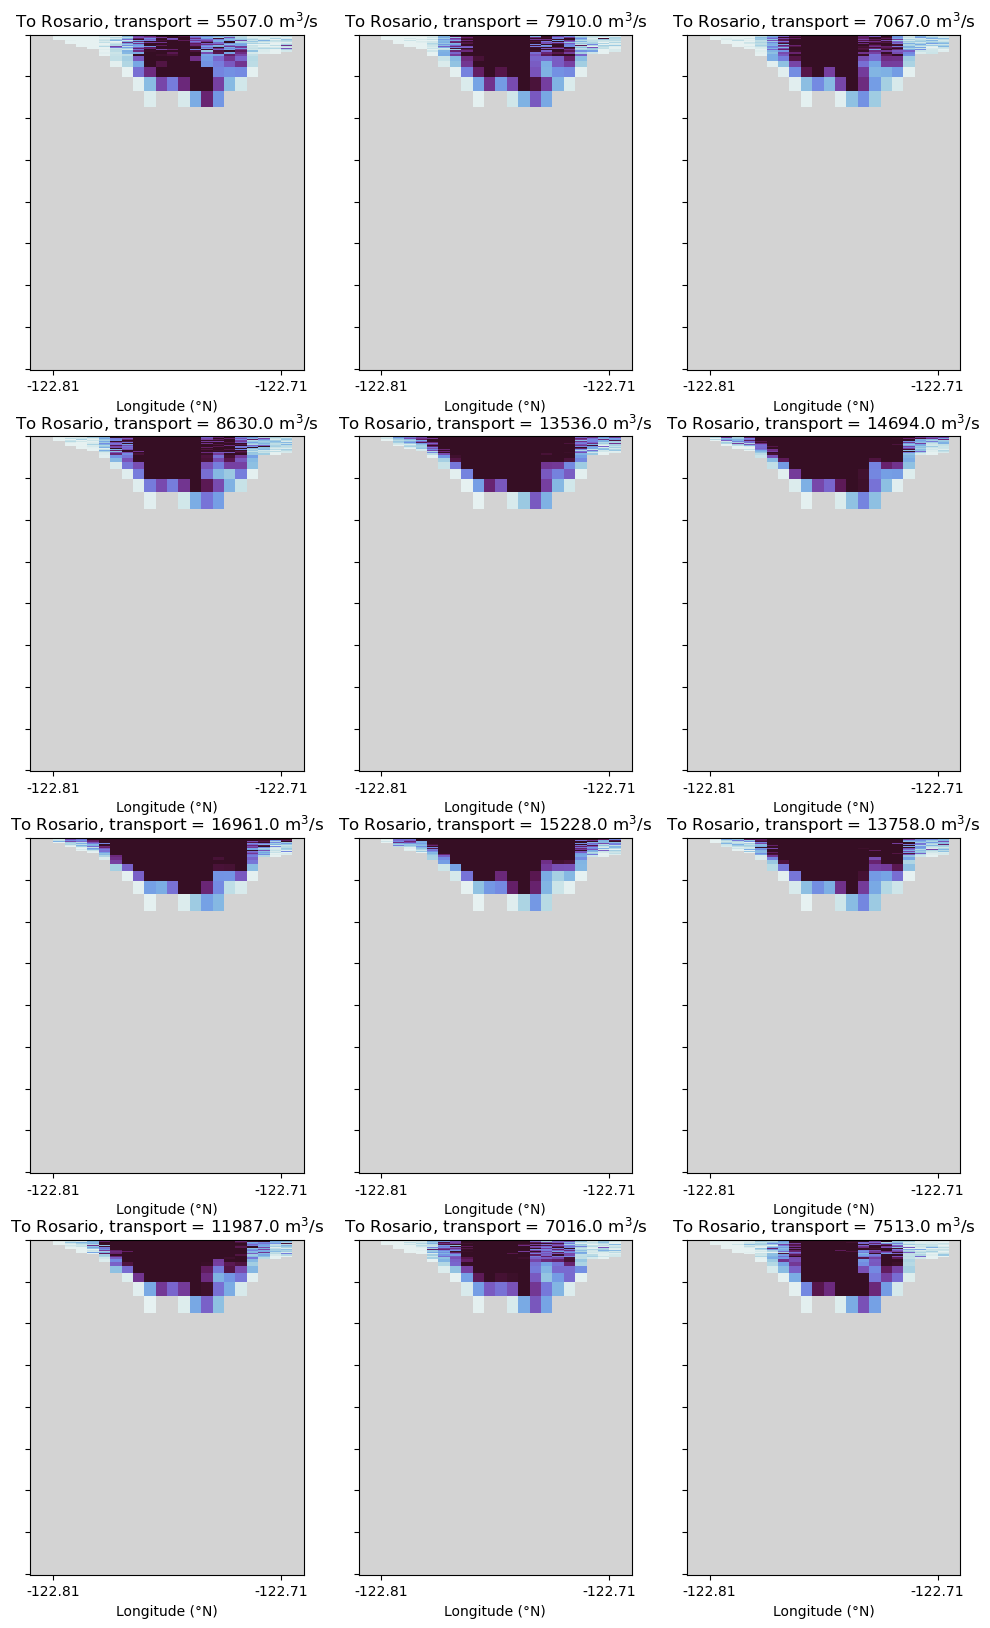

In [9]:
fig,[[ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9],[ax10,ax11,ax12]] = plt.subplots(4,3,figsize=(12,20))

for ii,ax in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]):
    title = 'To Rosario, transport = ' + str(np.round(np.sum(dict_all['prtoros']['final_transp'][months[ii]])/(23*days_month[ii]))) + f' m$^3$/s'
    plotCS(ax,dict_all['prtoros']['final_lon'][months[ii]].dropna(),dict_all['prtoros']['final_z'][months[ii]].dropna(),dict_all['prtoros']['final_transp'][months[ii]].dropna(),lonWros,lonEros,latros,38,0.02,23*30,title,False,False)

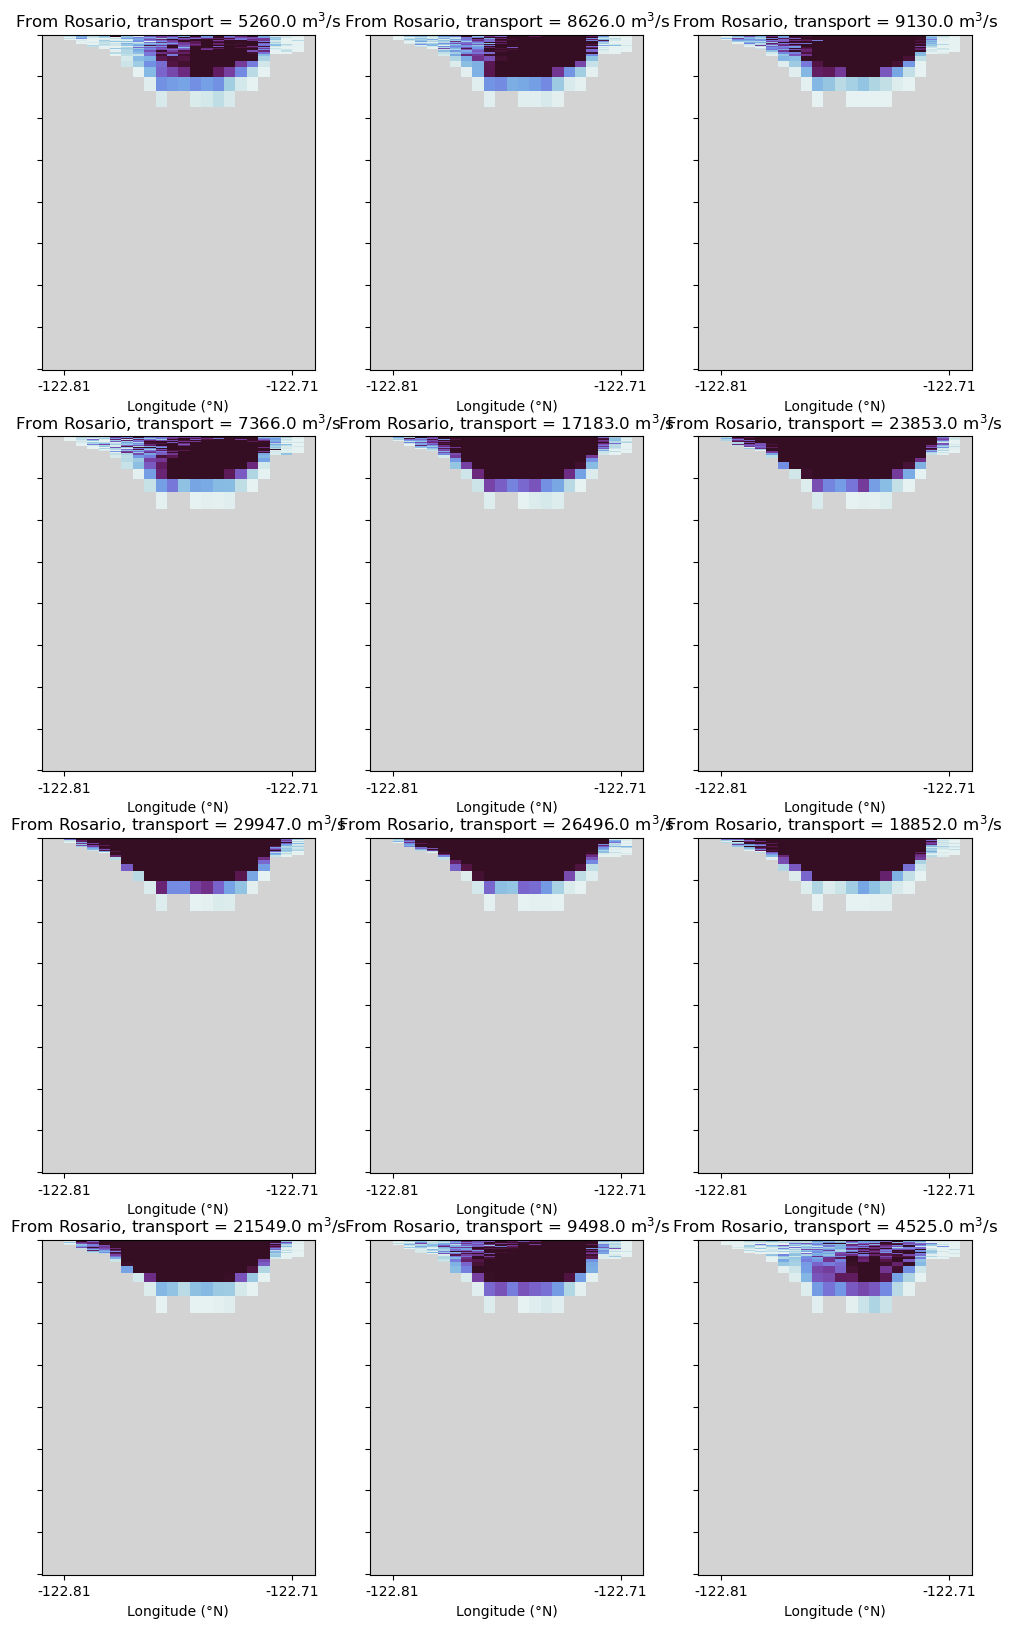

In [10]:
fig,[[ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9],[ax10,ax11,ax12]] = plt.subplots(4,3,figsize=(12,20))

for ii,ax in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]):
    title = 'From Rosario, transport = ' + str(np.round(np.sum(dict_all['rostovs']['final_transp'][months[ii]])/(23*days_month[ii]))) + f' m$^3$/s'
    plotCS(ax,dict_all['rostovs']['final_lon'][months[ii]].dropna(),dict_all['rostovs']['final_z'][months[ii]].dropna(),dict_all['rostovs']['final_transp'][months[ii]].dropna(),lonWros,lonEros,latros,38,0.02,23*days_month[ii],title,False,False)

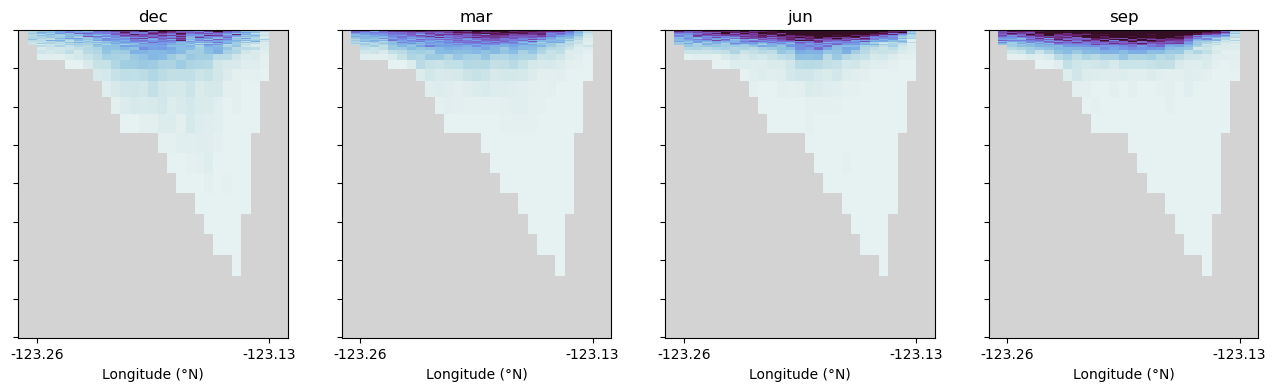

In [11]:
fig,[ax1,ax2,ax3,ax4] = plt.subplots(1,4,figsize=(16,4))

for ii,ax in enumerate([ax1,ax2,ax3,ax4]):
    plotCS(ax,dict_all['prtoharo']['final_lon'][months[ii*3-1]].dropna(),dict_all['prtoharo']['final_z'][months[ii*3-1]].dropna(),dict_all['prtoharo']['final_transp'][months[ii*3-1]].dropna(),lonWharo,lonEharo,latharo,38,0.1,23*days_month[ii*3-1],months[ii*3-1],False,False)

Text(0.5, 0.98, 'Forward PR seeding')

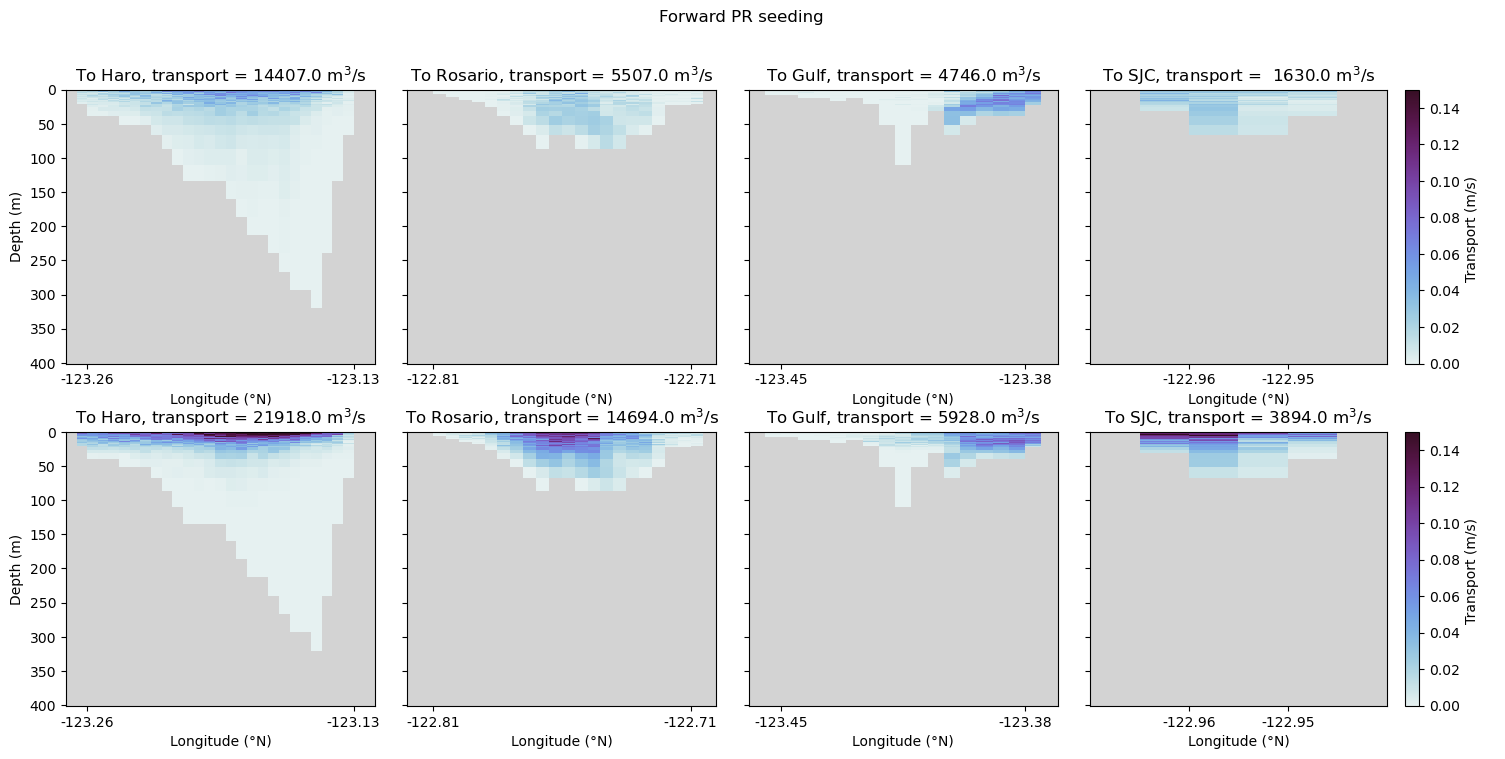

In [12]:
idx_dec = 0
idx_jun = 5

title = 'To Haro, transport = ' + str(np.round(np.sum(dict_all['prtoharo']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title2 = 'To Rosario, transport = ' + str(np.round(np.sum(dict_all['prtoros']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title3 = 'To SJC, transport =  ' + str(np.round(np.sum(dict_all['prtosjc']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title4 = 'To Gulf, transport = ' + str(np.round(np.sum(dict_all['prtogulf']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'

title5 = 'To Haro, transport = ' + str(np.round(np.sum(dict_all['prtoharo']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title6 = 'To Rosario, transport = ' + str(np.round(np.sum(dict_all['prtoros']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title7 = 'To SJC, transport = ' + str(np.round(np.sum(dict_all['prtosjc']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title8 = 'To Gulf, transport = ' + str(np.round(np.sum(dict_all['prtogulf']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'

fig,[[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8]] = plt.subplots(2,4,figsize=(18,8),gridspec_kw={'width_ratios':[1,1,1,1.2]})

plotCS(ax1,dict_all['prtoharo']['final_lon'][months[idx_dec]].dropna(),dict_all['prtoharo']['final_z'][months[idx_dec]].dropna(),dict_all['prtoharo']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,0.15,23*days_month[idx_dec],title,False,True)
plotCS(ax2,dict_all['prtoros']['final_lon'][months[idx_dec]].dropna(),dict_all['prtoros']['final_z'][months[idx_dec]].dropna(),dict_all['prtoros']['final_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.15,23*days_month[idx_dec],title2,False,False)
plotCS(ax4,dict_all['prtosjc']['final_lon'][months[idx_dec]].dropna(),dict_all['prtosjc']['final_z'][months[idx_dec]].dropna(),dict_all['prtosjc']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.15,23*days_month[idx_dec],title3,True,False)
plotCS(ax3,dict_all['prtogulf']['final_lon'][months[idx_dec]].dropna(),dict_all['prtogulf']['final_z'][months[idx_dec]].dropna(),dict_all['prtogulf']['final_transp'][months[idx_dec]].dropna(),lonWg1,lonEg1,latg1,38,0.15,23*days_month[idx_dec],title4,False,False)

plotCS(ax5,dict_all['prtoharo']['final_lon'][months[idx_jun]].dropna(),dict_all['prtoharo']['final_z'][months[idx_jun]].dropna(),dict_all['prtoharo']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,0.15,23*days_month[idx_jun],title5,False,True)
plotCS(ax6,dict_all['prtoros']['final_lon'][months[idx_jun]].dropna(),dict_all['prtoros']['final_z'][months[idx_jun]].dropna(),dict_all['prtoros']['final_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.15,23*days_month[idx_jun],title6,False,False)
plotCS(ax8,dict_all['prtosjc']['final_lon'][months[idx_jun]].dropna(),dict_all['prtosjc']['final_z'][months[idx_jun]].dropna(),dict_all['prtosjc']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.15,23*days_month[idx_jun],title7,True,False)
plotCS(ax7,dict_all['prtogulf']['final_lon'][months[idx_jun]].dropna(),dict_all['prtogulf']['final_z'][months[idx_jun]].dropna(),dict_all['prtogulf']['final_transp'][months[idx_jun]].dropna(),lonWg1,lonEg1,latg1,38,0.15,23*days_month[idx_jun],title8,False,False)

fig.subplots_adjust(wspace=0.1,hspace=0.25)
fig.suptitle('Forward PR seeding')

In [13]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/forPR_config3.png',bbox_inches='tight')

In [37]:
np.sum(dict_all['prtoharo']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec])

14406.585922341195

In [51]:
np.round(np.sum(dict_all['prtosjc']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))

1630.0

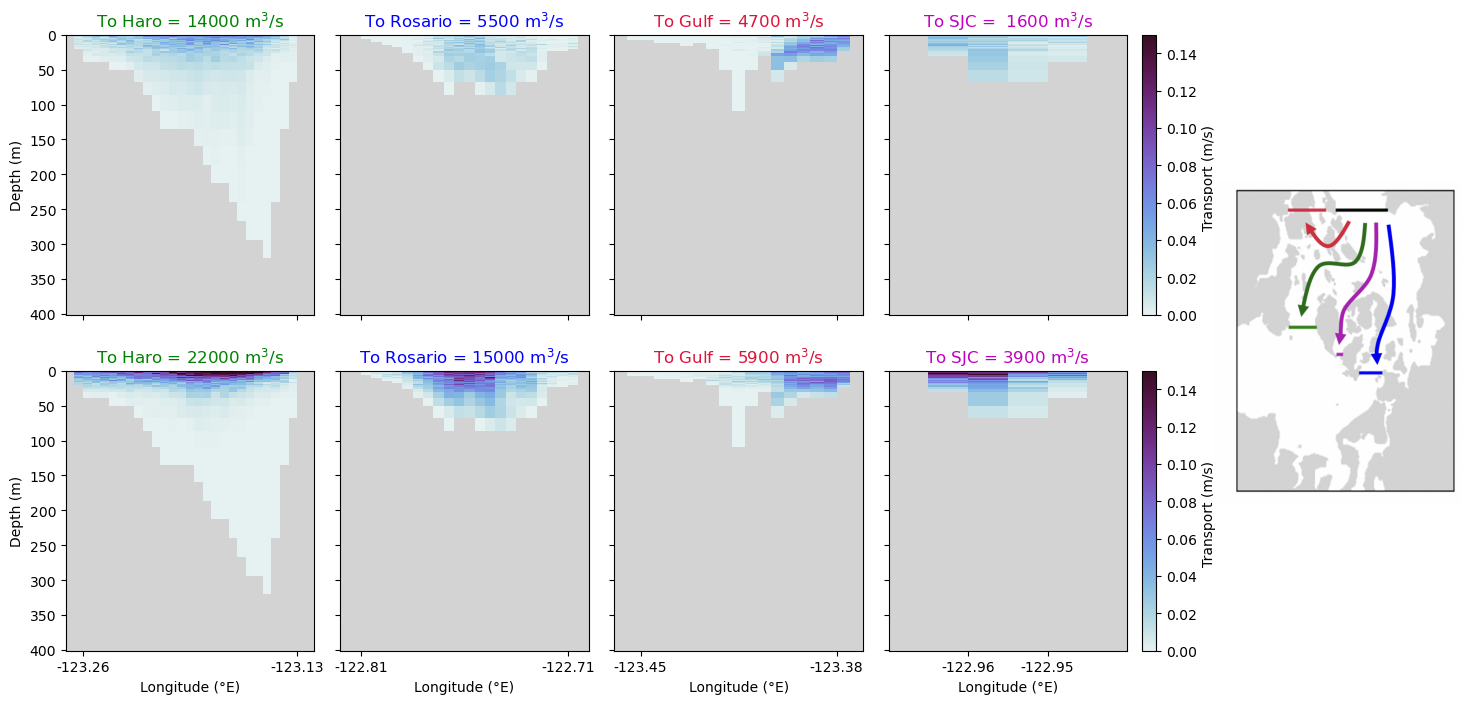

In [61]:
# number = np.sum(dict_all['prtoharo']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec])
title = 'To Haro = ' + str(int(np.round(np.sum(dict_all['prtoharo']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-3))) + f' m$^3$/s'
# title = 'To Haro = ' + str(int(np.round(np.sum(dict_all['prtoharo']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec])))) + f' m$^3$/s'
# number = np.sum(dict_all['prtoros']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec])
title2 = 'To Rosario = ' + str(int(np.round(np.sum(dict_all['prtoros']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2))) + f' m$^3$/s'
title3 = 'To SJC =  ' + str(int(np.round(np.sum(dict_all['prtosjc']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2))) + f' m$^3$/s'
title4 = 'To Gulf = ' + str(int(np.round(np.sum(dict_all['prtogulf']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2))) + f' m$^3$/s'

title5 = 'To Haro = ' + str(int(np.round(np.sum(dict_all['prtoharo']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3))) + f' m$^3$/s'
title6 = 'To Rosario = ' + str(int(np.round(np.sum(dict_all['prtoros']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3))) + f' m$^3$/s'
title7 = 'To SJC = ' + str(int(np.round(np.sum(dict_all['prtosjc']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-2))) + f' m$^3$/s'
title8 = 'To Gulf = ' + str(int(np.round(np.sum(dict_all['prtogulf']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-2))) + f' m$^3$/s'



# fig,[[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8]] = plt.subplots(2,4,figsize=(18,8),gridspec_kw={'width_ratios':[1,1,1,1.2]})

fig = plt.figure(figsize=(18, 8))
gs = fig.add_gridspec(2, 5, width_ratios=[1, 1, 1, 1.2, 1])

# Define subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[1, 2])
ax8 = fig.add_subplot(gs[1, 3])

plotCS(ax1,dict_all['prtoharo']['final_lon'][months[idx_dec]].dropna(),dict_all['prtoharo']['final_z'][months[idx_dec]].dropna(),dict_all['prtoharo']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,0.15,23*days_month[idx_dec],title,False,True)
plotCS(ax2,dict_all['prtoros']['final_lon'][months[idx_dec]].dropna(),dict_all['prtoros']['final_z'][months[idx_dec]].dropna(),dict_all['prtoros']['final_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.15,23*days_month[idx_dec],title2,False,False)
plotCS(ax4,dict_all['prtosjc']['final_lon'][months[idx_dec]].dropna(),dict_all['prtosjc']['final_z'][months[idx_dec]].dropna(),dict_all['prtosjc']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.15,23*days_month[idx_dec],title3,True,False)
plotCS(ax3,dict_all['prtogulf']['final_lon'][months[idx_dec]].dropna(),dict_all['prtogulf']['final_z'][months[idx_dec]].dropna(),dict_all['prtogulf']['final_transp'][months[idx_dec]].dropna(),lonWg1,lonEg1,latg1,38,0.15,23*days_month[idx_dec],title4,False,False)

plotCS(ax5,dict_all['prtoharo']['final_lon'][months[idx_jun]].dropna(),dict_all['prtoharo']['final_z'][months[idx_jun]].dropna(),dict_all['prtoharo']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,0.15,23*days_month[idx_jun],title5,False,True)
plotCS(ax6,dict_all['prtoros']['final_lon'][months[idx_jun]].dropna(),dict_all['prtoros']['final_z'][months[idx_jun]].dropna(),dict_all['prtoros']['final_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.15,23*days_month[idx_jun],title6,False,False)
plotCS(ax8,dict_all['prtosjc']['final_lon'][months[idx_jun]].dropna(),dict_all['prtosjc']['final_z'][months[idx_jun]].dropna(),dict_all['prtosjc']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.15,23*days_month[idx_jun],title7,True,False)
plotCS(ax7,dict_all['prtogulf']['final_lon'][months[idx_jun]].dropna(),dict_all['prtogulf']['final_z'][months[idx_jun]].dropna(),dict_all['prtogulf']['final_transp'][months[idx_jun]].dropna(),lonWg1,lonEg1,latg1,38,0.15,23*days_month[idx_jun],title8,False,False)

fig.subplots_adjust(wspace=0.1,hspace=0.2)
# fig.suptitle('Forward PR seeding')

ax_center = fig.add_subplot(gs[:, 4])

ax_center.imshow(plt.imread('/ocean/cstang/MOAD/analysis-camryn/Figures/map_cs_fpr.png'))
ax_center.axis('off');

ax1.set_title(title,color='green')
ax2.set_title(title2,color='b')
ax3.set_title(title4,color='crimson')
ax4.set_title(title3,color='m')
ax5.set_title(title5,color='green')
ax6.set_title(title6,color='b')
ax7.set_title(title8,color='crimson')
ax8.set_title(title7,color='m')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')
ax1.set_xticklabels('')
ax2.set_xticklabels('')
ax3.set_xticklabels('')
ax4.set_xticklabels('');

In [62]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/cs_fpr_wmap.png',bbox_inches='tight')

Text(0.5, 0.98, 'Backward VS seeding')

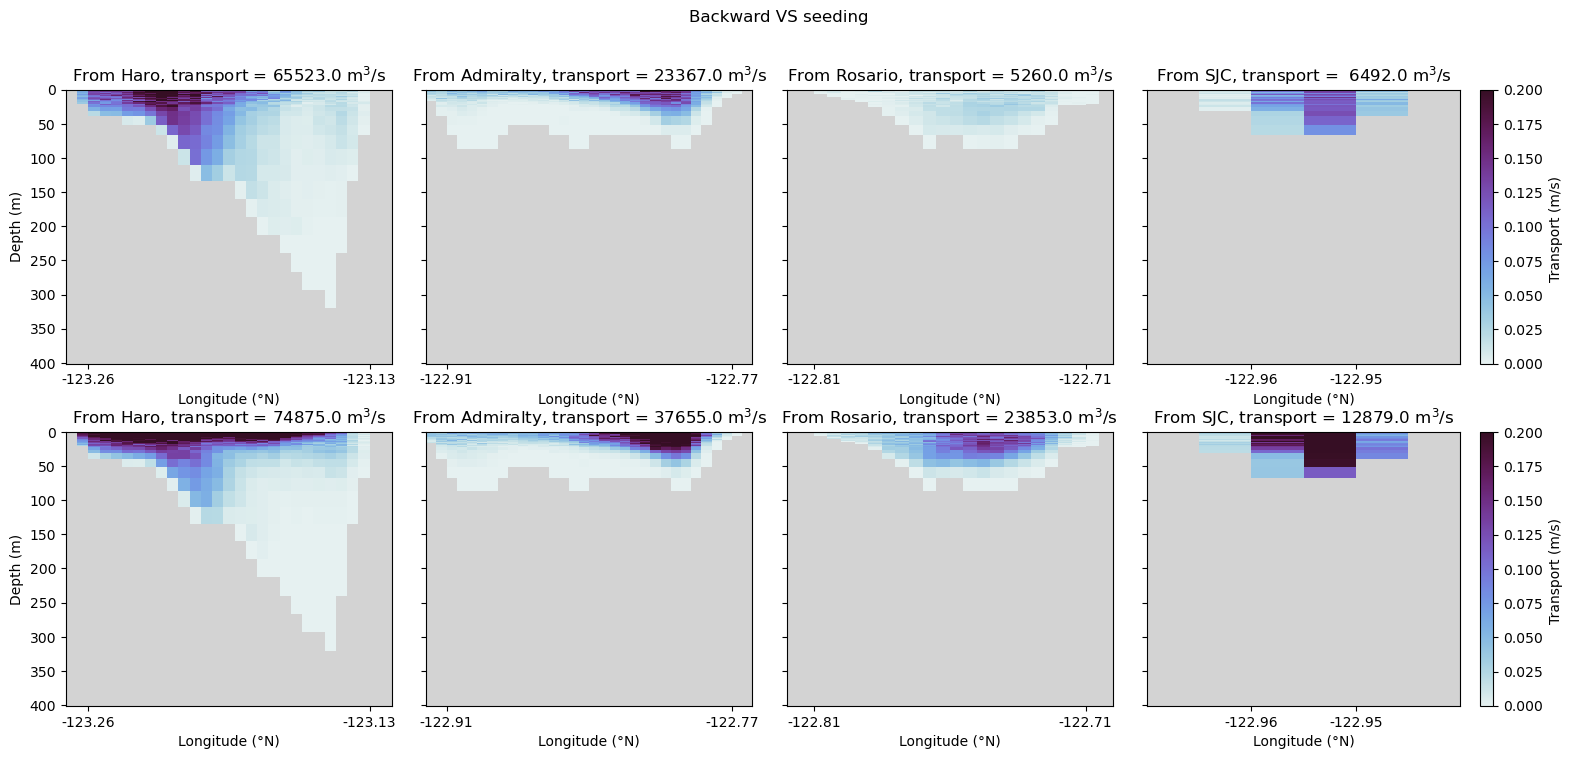

In [16]:
title = 'From Haro, transport = ' + str(np.round(np.sum(dict_all['harotovs']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title2 = 'From Rosario, transport = ' + str(np.round(np.sum(dict_all['rostovs']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title3 = 'From SJC, transport =  ' + str(np.round(np.sum(dict_all['sjctovs']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title4 = 'From Admiralty, transport = ' + str(np.round(np.sum(dict_all['admtovs']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'

title5 = 'From Haro, transport = ' + str(np.round(np.sum(dict_all['harotovs']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title6 = 'From Rosario, transport = ' + str(np.round(np.sum(dict_all['rostovs']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title7 = 'From SJC, transport = ' + str(np.round(np.sum(dict_all['sjctovs']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title8 = 'From Admiralty, transport = ' + str(np.round(np.sum(dict_all['admtovs']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'

fig,[[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8]] = plt.subplots(2,4,figsize=(19,8),gridspec_kw={'width_ratios':[1,1,1,1.2]})

plotCS(ax1,dict_all['harotovs']['final_lon'][months[idx_dec]].dropna(),dict_all['harotovs']['final_z'][months[idx_dec]].dropna(),dict_all['harotovs']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_dec],title,False,True)
plotCS(ax3,dict_all['rostovs']['final_lon'][months[idx_dec]].dropna(),dict_all['rostovs']['final_z'][months[idx_dec]].dropna(),dict_all['rostovs']['final_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_dec],title2,False,False)
plotCS(ax4,dict_all['sjctovs']['final_lon'][months[idx_dec]].dropna(),dict_all['sjctovs']['final_z'][months[idx_dec]].dropna(),dict_all['sjctovs']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_dec],title3,True,False)
plotCS(ax2,dict_all['admtovs']['final_lon'][months[idx_dec]].dropna(),dict_all['admtovs']['final_z'][months[idx_dec]].dropna(),dict_all['admtovs']['final_transp'][months[idx_dec]].dropna(),lonWadm,lonEadm,latadm,38,0.2,23*days_month[idx_dec],title4,False,False)

plotCS(ax5,dict_all['harotovs']['final_lon'][months[idx_jun]].dropna(),dict_all['harotovs']['final_z'][months[idx_jun]].dropna(),dict_all['harotovs']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_jun],title5,False,True)
plotCS(ax7,dict_all['rostovs']['final_lon'][months[idx_jun]].dropna(),dict_all['rostovs']['final_z'][months[idx_jun]].dropna(),dict_all['rostovs']['final_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_jun],title6,False,False)
plotCS(ax8,dict_all['sjctovs']['final_lon'][months[idx_jun]].dropna(),dict_all['sjctovs']['final_z'][months[idx_jun]].dropna(),dict_all['sjctovs']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_jun],title7,True,False)
plotCS(ax6,dict_all['admtovs']['final_lon'][months[idx_jun]].dropna(),dict_all['admtovs']['final_z'][months[idx_jun]].dropna(),dict_all['admtovs']['final_transp'][months[idx_jun]].dropna(),lonWadm,lonEadm,latadm,38,0.2,23*days_month[idx_jun],title8,False,False)

fig.subplots_adjust(wspace=0.1,hspace=0.25)
fig.suptitle('Backward VS seeding')

Less coming from rosario than from SJC (ONLY in winter) -> makes sense if more of rosario is going to admiralty

### Config 3

Text(0.5, 0.98, 'Backward VS seeding')

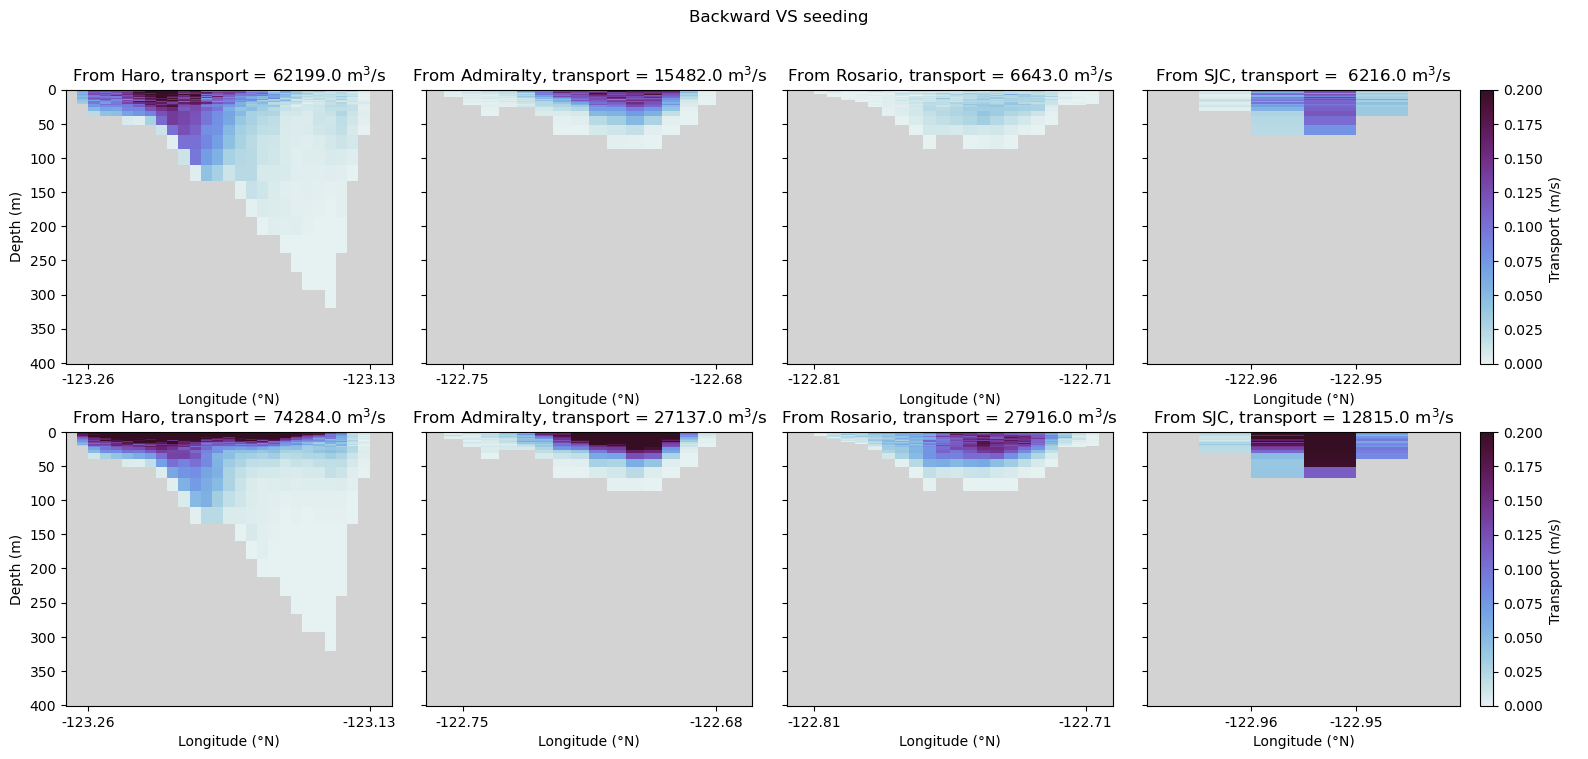

In [17]:
lonWadm3 = 250
lonEadm3 = 268
latadm3 = 200

title = 'From Haro, transport = ' + str(np.round(np.sum(dict_all['harotovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title2 = 'From Rosario, transport = ' + str(np.round(np.sum(dict_all['rostovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title3 = 'From SJC, transport =  ' + str(np.round(np.sum(dict_all['sjctovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title4 = 'From Admiralty, transport = ' + str(np.round(np.sum(dict_all['admtovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'

title5 = 'From Haro, transport = ' + str(np.round(np.sum(dict_all['harotovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title6 = 'From Rosario, transport = ' + str(np.round(np.sum(dict_all['rostovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title7 = 'From SJC, transport = ' + str(np.round(np.sum(dict_all['sjctovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title8 = 'From Admiralty, transport = ' + str(np.round(np.sum(dict_all['admtovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'

fig,[[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8]] = plt.subplots(2,4,figsize=(19,8),gridspec_kw={'width_ratios':[1,1,1,1.2]})

plotCS(ax1,dict_all['harotovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['harotovs3']['final_z'][months[idx_dec]].dropna(),dict_all['harotovs3']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_dec],title,False,True)
plotCS(ax3,dict_all['rostovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['rostovs3']['final_z'][months[idx_dec]].dropna(),dict_all['rostovs3']['final_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_dec],title2,False,False)
plotCS(ax4,dict_all['sjctovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['sjctovs3']['final_z'][months[idx_dec]].dropna(),dict_all['sjctovs3']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_dec],title3,True,False)
plotCS(ax2,dict_all['admtovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['admtovs3']['final_z'][months[idx_dec]].dropna(),dict_all['admtovs3']['final_transp'][months[idx_dec]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_dec],title4,False,False)

plotCS(ax5,dict_all['harotovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['harotovs3']['final_z'][months[idx_jun]].dropna(),dict_all['harotovs3']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_jun],title5,False,True)
plotCS(ax7,dict_all['rostovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['rostovs3']['final_z'][months[idx_jun]].dropna(),dict_all['rostovs3']['final_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_jun],title6,False,False)
plotCS(ax8,dict_all['sjctovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['sjctovs3']['final_z'][months[idx_jun]].dropna(),dict_all['sjctovs3']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_jun],title7,True,False)
plotCS(ax6,dict_all['admtovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['admtovs3']['final_z'][months[idx_jun]].dropna(),dict_all['admtovs3']['final_transp'][months[idx_jun]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_jun],title8,False,False)

fig.subplots_adjust(wspace=0.1,hspace=0.25)
fig.suptitle('Backward VS seeding')

In [18]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/backVS_config3.png',bbox_inches='tight')

### Combined eastern JdF

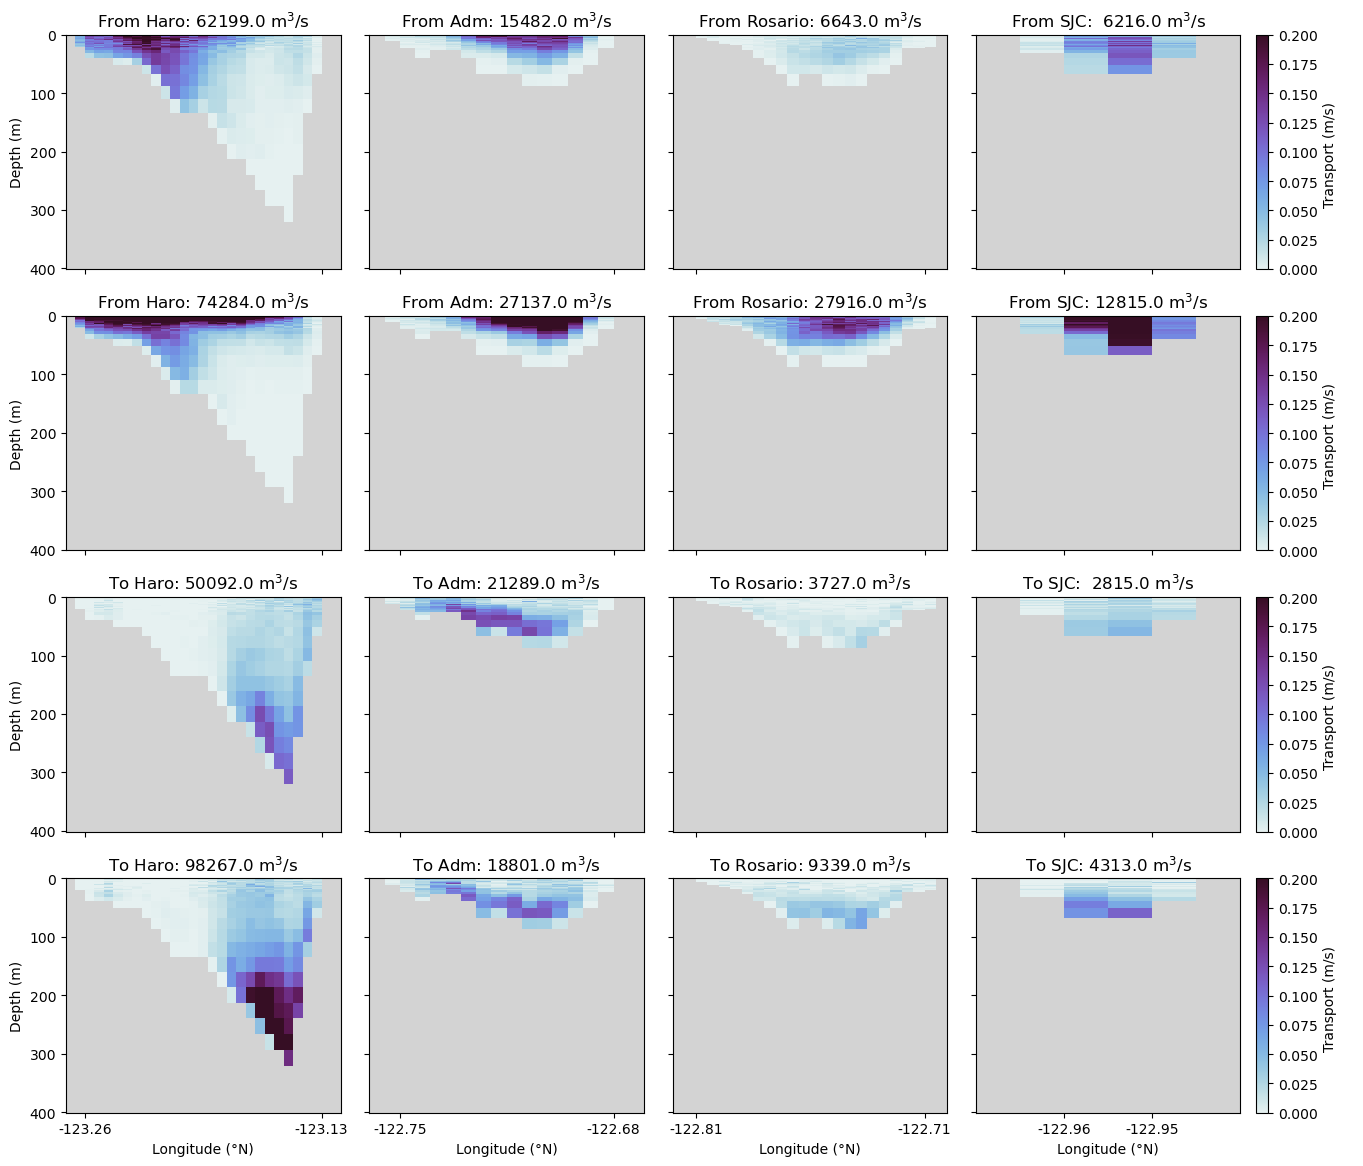

In [19]:
lonWadm3 = 250
lonEadm3 = 268
latadm3 = 200

title = 'From Haro: ' + str(np.round(np.sum(dict_all['harotovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title2 = 'From Rosario: ' + str(np.round(np.sum(dict_all['rostovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title3 = 'From SJC:  ' + str(np.round(np.sum(dict_all['sjctovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title4 = 'From Adm: ' + str(np.round(np.sum(dict_all['admtovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'

title5 = 'From Haro: ' + str(np.round(np.sum(dict_all['harotovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title6 = 'From Rosario: ' + str(np.round(np.sum(dict_all['rostovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title7 = 'From SJC: ' + str(np.round(np.sum(dict_all['sjctovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title8 = 'From Adm: ' + str(np.round(np.sum(dict_all['admtovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'

fig,[[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8],[ax9,ax10,ax11,ax12],[ax13,ax14,ax15,ax16]] = plt.subplots(4,4,figsize=(16,14),gridspec_kw={'width_ratios':[1,1,1,1.2]})

plotCS(ax1,dict_all['harotovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['harotovs3']['final_z'][months[idx_dec]].dropna(),dict_all['harotovs3']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_dec],title,False,True)
plotCS(ax3,dict_all['rostovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['rostovs3']['final_z'][months[idx_dec]].dropna(),dict_all['rostovs3']['final_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_dec],title2,False,False)
plotCS(ax4,dict_all['sjctovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['sjctovs3']['final_z'][months[idx_dec]].dropna(),dict_all['sjctovs3']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_dec],title3,True,False)
plotCS(ax2,dict_all['admtovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['admtovs3']['final_z'][months[idx_dec]].dropna(),dict_all['admtovs3']['final_transp'][months[idx_dec]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_dec],title4,False,False)

plotCS(ax5,dict_all['harotovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['harotovs3']['final_z'][months[idx_jun]].dropna(),dict_all['harotovs3']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_jun],title5,False,True)
plotCS(ax7,dict_all['rostovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['rostovs3']['final_z'][months[idx_jun]].dropna(),dict_all['rostovs3']['final_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_jun],title6,False,False)
plotCS(ax8,dict_all['sjctovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['sjctovs3']['final_z'][months[idx_jun]].dropna(),dict_all['sjctovs3']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_jun],title7,True,False)
plotCS(ax6,dict_all['admtovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['admtovs3']['final_z'][months[idx_jun]].dropna(),dict_all['admtovs3']['final_transp'][months[idx_jun]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_jun],title8,False,False)

title = 'To Haro: ' + str(np.round(np.sum(dict_all['vstoharo3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title2 = 'To Rosario: ' + str(np.round(np.sum(dict_all['vstoros3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title3 = 'To SJC:  ' + str(np.round(np.sum(dict_all['vstosjc3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title4 = 'To Adm: ' + str(np.round(np.sum(dict_all['vstoadm3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'

title5 = 'To Haro: ' + str(np.round(np.sum(dict_all['vstoharo3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title6 = 'To Rosario: ' + str(np.round(np.sum(dict_all['vstoros3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title7 = 'To SJC: ' + str(np.round(np.sum(dict_all['vstosjc3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title8 = 'To Adm: ' + str(np.round(np.sum(dict_all['vstoadm3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'

plotCS(ax9,dict_all['vstoharo3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoharo3']['final_z'][months[idx_dec]].dropna(),dict_all['vstoharo3']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_dec],title,False,True)
plotCS(ax11,dict_all['vstoros3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoros3']['final_z'][months[idx_dec]].dropna(),dict_all['vstoros3']['final_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_dec],title2,False,False)
plotCS(ax12,dict_all['vstosjc3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstosjc3']['final_z'][months[idx_dec]].dropna(),dict_all['vstosjc3']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_dec],title3,True,False)
plotCS(ax10,dict_all['vstoadm3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoadm3']['final_z'][months[idx_dec]].dropna(),dict_all['vstoadm3']['final_transp'][months[idx_dec]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_dec],title4,False,False)

plotCS(ax13,dict_all['vstoharo3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoharo3']['final_z'][months[idx_jun]].dropna(),dict_all['vstoharo3']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_jun],title5,False,True)
plotCS(ax15,dict_all['vstoros3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoros3']['final_z'][months[idx_jun]].dropna(),dict_all['vstoros3']['final_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_jun],title6,False,False)
plotCS(ax16,dict_all['vstosjc3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstosjc3']['final_z'][months[idx_jun]].dropna(),dict_all['vstosjc3']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_jun],title7,True,False)
plotCS(ax14,dict_all['vstoadm3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoadm3']['final_z'][months[idx_jun]].dropna(),dict_all['vstoadm3']['final_transp'][months[idx_jun]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_jun],title8,False,False)

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')
ax5.set_xlabel('')
ax6.set_xlabel('')
ax7.set_xlabel('')
ax8.set_xlabel('')
ax9.set_xlabel('')
ax10.set_xlabel('')
ax11.set_xlabel('')
ax12.set_xlabel('')

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax4.set_xticklabels([])
ax5.set_xticklabels([])
ax6.set_xticklabels([])
ax7.set_xticklabels([])
ax8.set_xticklabels([])
ax9.set_xticklabels([])
ax10.set_xticklabels([])
ax11.set_xticklabels([])
ax12.set_xticklabels([])

fig.subplots_adjust(wspace=0.1,hspace=0.20)

In [20]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/ejdf_sections.png',bbox_inches='tight')

### Add map

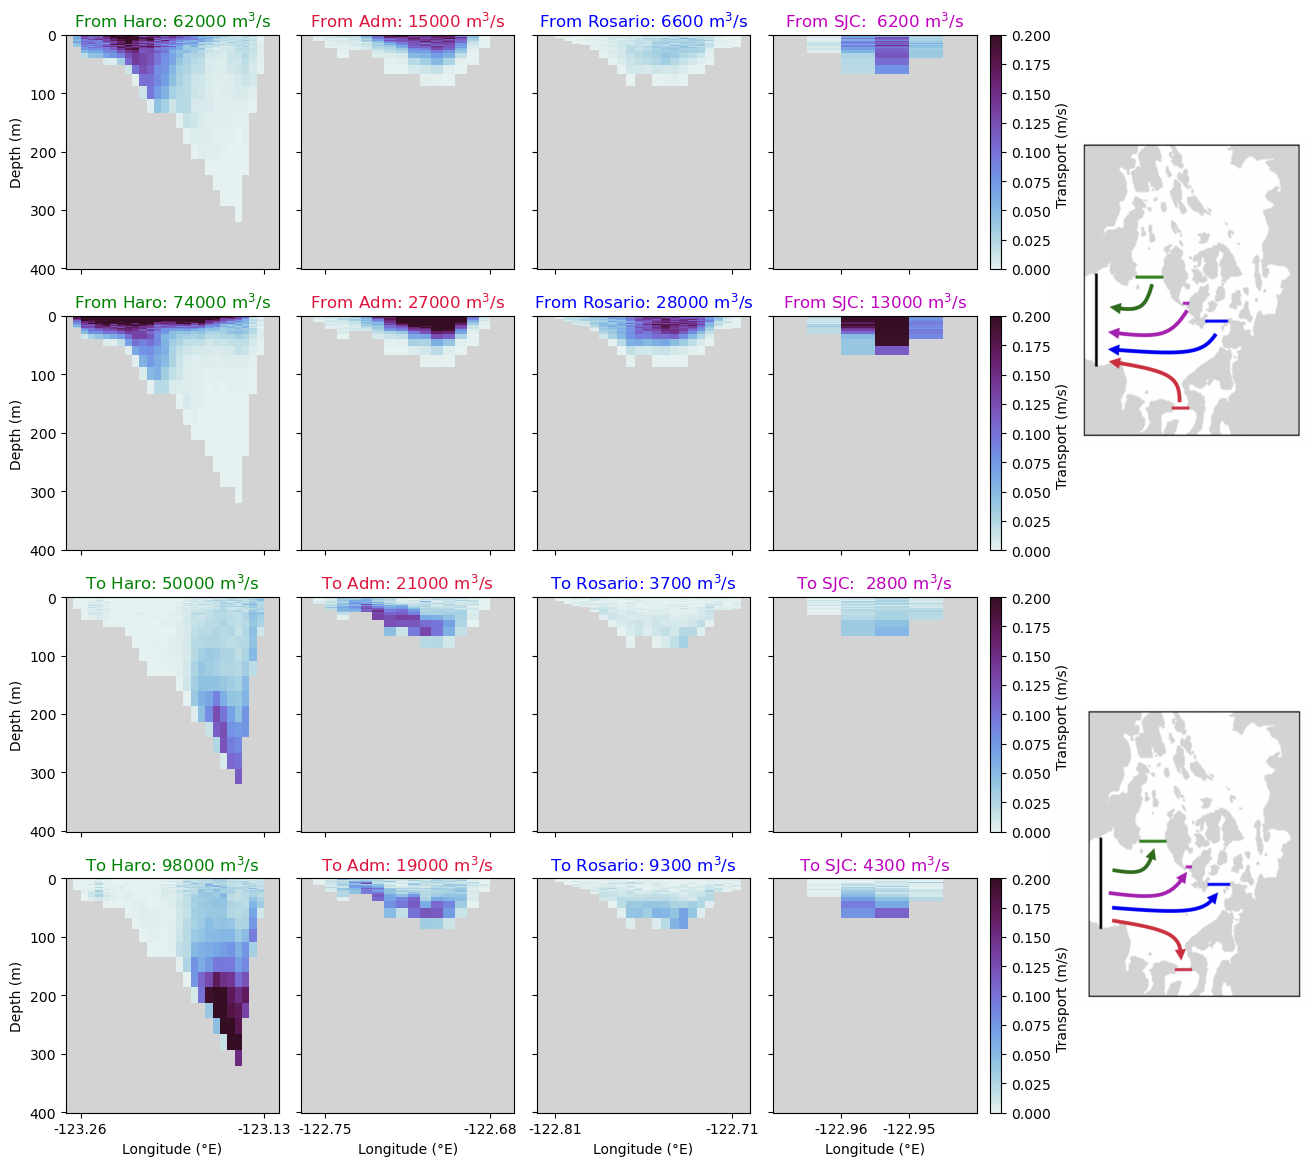

In [65]:
lonWadm3 = 250
lonEadm3 = 268
latadm3 = 200

title = 'From Haro: ' + str(int(np.round(np.sum(dict_all['harotovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-3))) + f' m$^3$/s'
title2 = 'From Rosario: ' + str(int(np.round(np.sum(dict_all['rostovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2))) + f' m$^3$/s'
title3 = 'From SJC:  ' + str(int(np.round(np.sum(dict_all['sjctovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2))) + f' m$^3$/s'
title4 = 'From Adm: ' + str(int(np.round(np.sum(dict_all['admtovs3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-3))) + f' m$^3$/s'

title5 = 'From Haro: ' + str(int(np.round(np.sum(dict_all['harotovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3))) + f' m$^3$/s'
title6 = 'From Rosario: ' + str(int(np.round(np.sum(dict_all['rostovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3))) + f' m$^3$/s'
title7 = 'From SJC: ' + str(int(np.round(np.sum(dict_all['sjctovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3))) + f' m$^3$/s'
title8 = 'From Adm: ' + str(int(np.round(np.sum(dict_all['admtovs3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3))) + f' m$^3$/s'

fig = plt.figure(figsize=(16, 14))
gs = fig.add_gridspec(4, 5, width_ratios=[1, 1, 1, 1.2, 1.2])

# Define subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[1, 2])
ax8 = fig.add_subplot(gs[1, 3])

ax_center1 = fig.add_subplot(gs[0:2, 4])
ax_center1.imshow(plt.imread('/ocean/cstang/MOAD/analysis-camryn/Figures/map_cs_bvs.png'))
ax_center1.axis('off');

ax_center2 = fig.add_subplot(gs[2:, 4])
ax_center2.imshow(plt.imread('/ocean/cstang/MOAD/analysis-camryn/Figures/map_cs_fvs.png'))
ax_center2.axis('off');

plotCS(ax1,dict_all['harotovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['harotovs3']['final_z'][months[idx_dec]].dropna(),dict_all['harotovs3']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_dec],title,False,True)
plotCS(ax3,dict_all['rostovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['rostovs3']['final_z'][months[idx_dec]].dropna(),dict_all['rostovs3']['final_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_dec],title2,False,False)
plotCS(ax4,dict_all['sjctovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['sjctovs3']['final_z'][months[idx_dec]].dropna(),dict_all['sjctovs3']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_dec],title3,True,False)
plotCS(ax2,dict_all['admtovs3']['final_lon'][months[idx_dec]].dropna(),dict_all['admtovs3']['final_z'][months[idx_dec]].dropna(),dict_all['admtovs3']['final_transp'][months[idx_dec]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_dec],title4,False,False)

plotCS(ax5,dict_all['harotovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['harotovs3']['final_z'][months[idx_jun]].dropna(),dict_all['harotovs3']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_jun],title5,False,True)
plotCS(ax7,dict_all['rostovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['rostovs3']['final_z'][months[idx_jun]].dropna(),dict_all['rostovs3']['final_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_jun],title6,False,False)
plotCS(ax8,dict_all['sjctovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['sjctovs3']['final_z'][months[idx_jun]].dropna(),dict_all['sjctovs3']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_jun],title7,True,False)
plotCS(ax6,dict_all['admtovs3']['final_lon'][months[idx_jun]].dropna(),dict_all['admtovs3']['final_z'][months[idx_jun]].dropna(),dict_all['admtovs3']['final_transp'][months[idx_jun]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_jun],title8,False,False)

ax1.set_title(title,color='green')
ax2.set_title(title4,color='crimson')
ax3.set_title(title2,color='b')
ax4.set_title(title3,color='m')
ax5.set_title(title5,color='green')
ax6.set_title(title8,color='crimson')
ax7.set_title(title6,color='b')
ax8.set_title(title7,color='m')

title = 'To Haro: ' + str(int(np.round(np.sum(dict_all['vstoharo3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-3))) + f' m$^3$/s'
title2 = 'To Rosario: ' + str(int(np.round(np.sum(dict_all['vstoros3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2))) + f' m$^3$/s'
title3 = 'To SJC:  ' + str(int(np.round(np.sum(dict_all['vstosjc3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-2))) + f' m$^3$/s'
title4 = 'To Adm: ' + str(int(np.round(np.sum(dict_all['vstoadm3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]),-3))) + f' m$^3$/s'

title5 = 'To Haro: ' + str(int(np.round(np.sum(dict_all['vstoharo3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3))) + f' m$^3$/s'
title6 = 'To Rosario: ' + str(int(np.round(np.sum(dict_all['vstoros3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-2))) + f' m$^3$/s'
title7 = 'To SJC: ' + str(int(np.round(np.sum(dict_all['vstosjc3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-2))) + f' m$^3$/s'
title8 = 'To Adm: ' + str(int(np.round(np.sum(dict_all['vstoadm3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]),-3))) + f' m$^3$/s'

ax9 = fig.add_subplot(gs[2, 0])
ax10 = fig.add_subplot(gs[2, 1])
ax11 = fig.add_subplot(gs[2, 2])
ax12 = fig.add_subplot(gs[2, 3])
ax13 = fig.add_subplot(gs[3, 0])
ax14 = fig.add_subplot(gs[3, 1])
ax15 = fig.add_subplot(gs[3, 2])
ax16 = fig.add_subplot(gs[3, 3])

plotCS(ax9,dict_all['vstoharo3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoharo3']['final_z'][months[idx_dec]].dropna(),dict_all['vstoharo3']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_dec],title,False,True)
plotCS(ax11,dict_all['vstoros3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoros3']['final_z'][months[idx_dec]].dropna(),dict_all['vstoros3']['final_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_dec],title2,False,False)
plotCS(ax12,dict_all['vstosjc3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstosjc3']['final_z'][months[idx_dec]].dropna(),dict_all['vstosjc3']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_dec],title3,True,False)
plotCS(ax10,dict_all['vstoadm3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoadm3']['final_z'][months[idx_dec]].dropna(),dict_all['vstoadm3']['final_transp'][months[idx_dec]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_dec],title4,False,False)

plotCS(ax13,dict_all['vstoharo3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoharo3']['final_z'][months[idx_jun]].dropna(),dict_all['vstoharo3']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,0.2,23*days_month[idx_jun],title5,False,True)
plotCS(ax15,dict_all['vstoros3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoros3']['final_z'][months[idx_jun]].dropna(),dict_all['vstoros3']['final_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.2,23*days_month[idx_jun],title6,False,False)
plotCS(ax16,dict_all['vstosjc3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstosjc3']['final_z'][months[idx_jun]].dropna(),dict_all['vstosjc3']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.2,23*days_month[idx_jun],title7,True,False)
plotCS(ax14,dict_all['vstoadm3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoadm3']['final_z'][months[idx_jun]].dropna(),dict_all['vstoadm3']['final_transp'][months[idx_jun]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_jun],title8,False,False)

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')
ax5.set_xlabel('')
ax6.set_xlabel('')
ax7.set_xlabel('')
ax8.set_xlabel('')
ax9.set_xlabel('')
ax10.set_xlabel('')
ax11.set_xlabel('')
ax12.set_xlabel('')

ax9.set_title(title,color='green')
ax10.set_title(title4,color='crimson')
ax11.set_title(title2,color='b')
ax12.set_title(title3,color='m')
ax13.set_title(title5,color='green')
ax14.set_title(title8,color='crimson')
ax15.set_title(title6,color='b')
ax16.set_title(title7,color='m')

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax4.set_xticklabels([])
ax5.set_xticklabels([])
ax6.set_xticklabels([])
ax7.set_xticklabels([])
ax8.set_xticklabels([])
ax9.set_xticklabels([])
ax10.set_xticklabels([])
ax11.set_xticklabels([])
ax12.set_xticklabels([])

fig.subplots_adjust(wspace=0.1,hspace=0.20)

In [66]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/ejdf_sections_wmap.png',bbox_inches='tight')

Text(0.5, 0.98, 'Forward VS seeding')

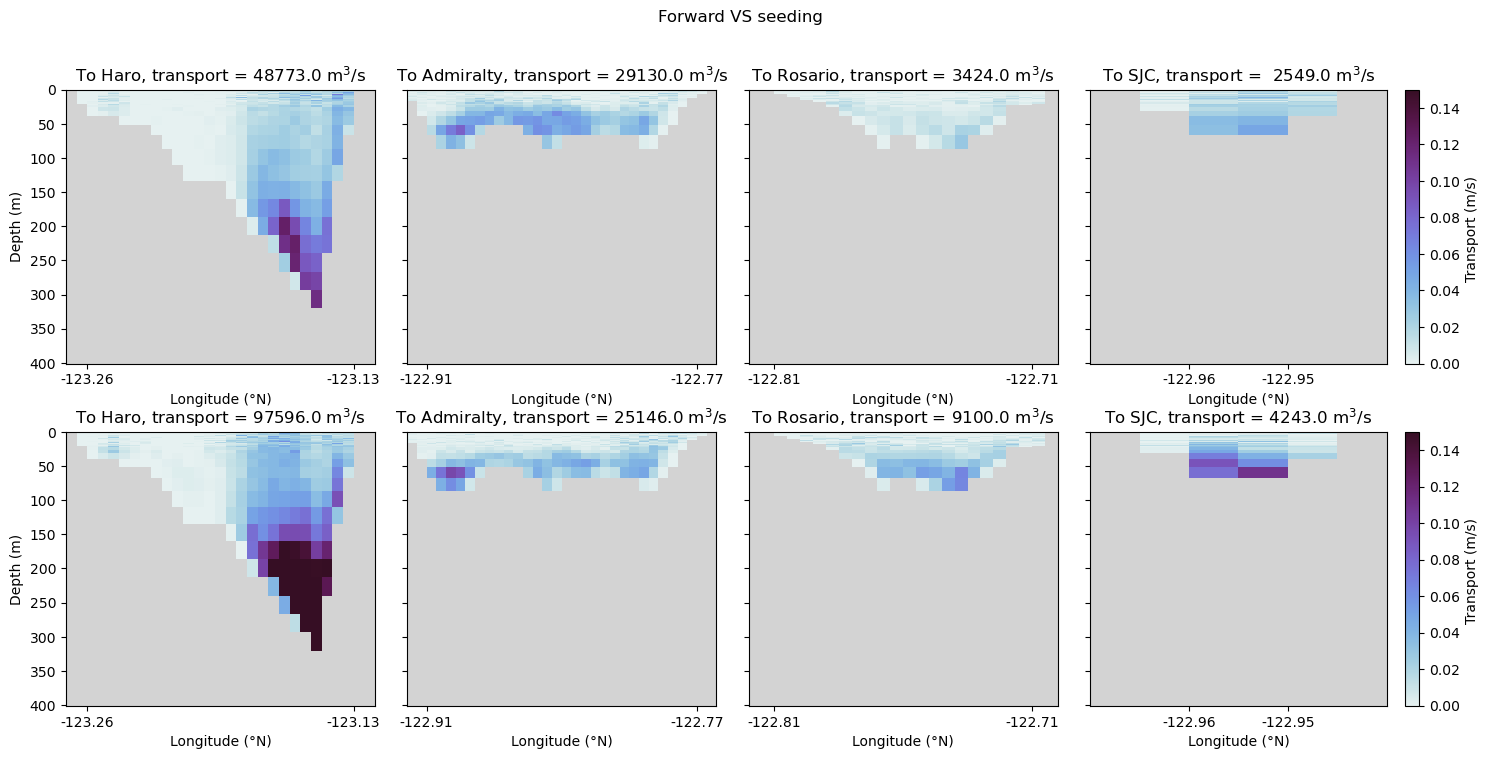

In [23]:
title = 'To Haro, transport = ' + str(np.round(np.sum(dict_all['vstoharo']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title2 = 'To Rosario, transport = ' + str(np.round(np.sum(dict_all['vstoros']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title3 = 'To SJC, transport =  ' + str(np.round(np.sum(dict_all['vstosjc']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title4 = 'To Admiralty, transport = ' + str(np.round(np.sum(dict_all['vstoadm']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'

title5 = 'To Haro, transport = ' + str(np.round(np.sum(dict_all['vstoharo']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title6 = 'To Rosario, transport = ' + str(np.round(np.sum(dict_all['vstoros']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title7 = 'To SJC, transport = ' + str(np.round(np.sum(dict_all['vstosjc']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title8 = 'To Admiralty, transport = ' + str(np.round(np.sum(dict_all['vstoadm']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'

fig,[[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8]] = plt.subplots(2,4,figsize=(18,8),gridspec_kw={'width_ratios':[1,1,1,1.2]})

plotCS(ax1,dict_all['vstoharo']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoharo']['final_z'][months[idx_dec]].dropna(),dict_all['vstoharo']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,0.15,23*days_month[idx_dec],title,False,True)
plotCS(ax3,dict_all['vstoros']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoros']['final_z'][months[idx_dec]].dropna(),dict_all['vstoros']['final_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.15,23*days_month[idx_dec],title2,False,False)
plotCS(ax4,dict_all['vstosjc']['final_lon'][months[idx_dec]].dropna(),dict_all['vstosjc']['final_z'][months[idx_dec]].dropna(),dict_all['vstosjc']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.15,23*days_month[idx_dec],title3,True,False)
plotCS(ax2,dict_all['vstoadm']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoadm']['final_z'][months[idx_dec]].dropna(),dict_all['vstoadm']['final_transp'][months[idx_dec]].dropna(),lonWadm,lonEadm,latadm,38,0.2,23*days_month[idx_dec],title4,False,False)

plotCS(ax5,dict_all['vstoharo']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoharo']['final_z'][months[idx_jun]].dropna(),dict_all['vstoharo']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,0.15,23*days_month[idx_jun],title5,False,True)
plotCS(ax7,dict_all['vstoros']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoros']['final_z'][months[idx_jun]].dropna(),dict_all['vstoros']['final_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.15,23*days_month[idx_jun],title6,False,False)
plotCS(ax8,dict_all['vstosjc']['final_lon'][months[idx_jun]].dropna(),dict_all['vstosjc']['final_z'][months[idx_jun]].dropna(),dict_all['vstosjc']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.15,23*days_month[idx_jun],title7,True,False)
plotCS(ax6,dict_all['vstoadm']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoadm']['final_z'][months[idx_jun]].dropna(),dict_all['vstoadm']['final_transp'][months[idx_jun]].dropna(),lonWadm,lonEadm,latadm,38,0.2,23*days_month[idx_jun],title8,False,False)

fig.subplots_adjust(wspace=0.1,hspace=0.25)
fig.suptitle('Forward VS seeding')

### Config 3

Text(0.5, 0.98, 'Forward VS seeding')

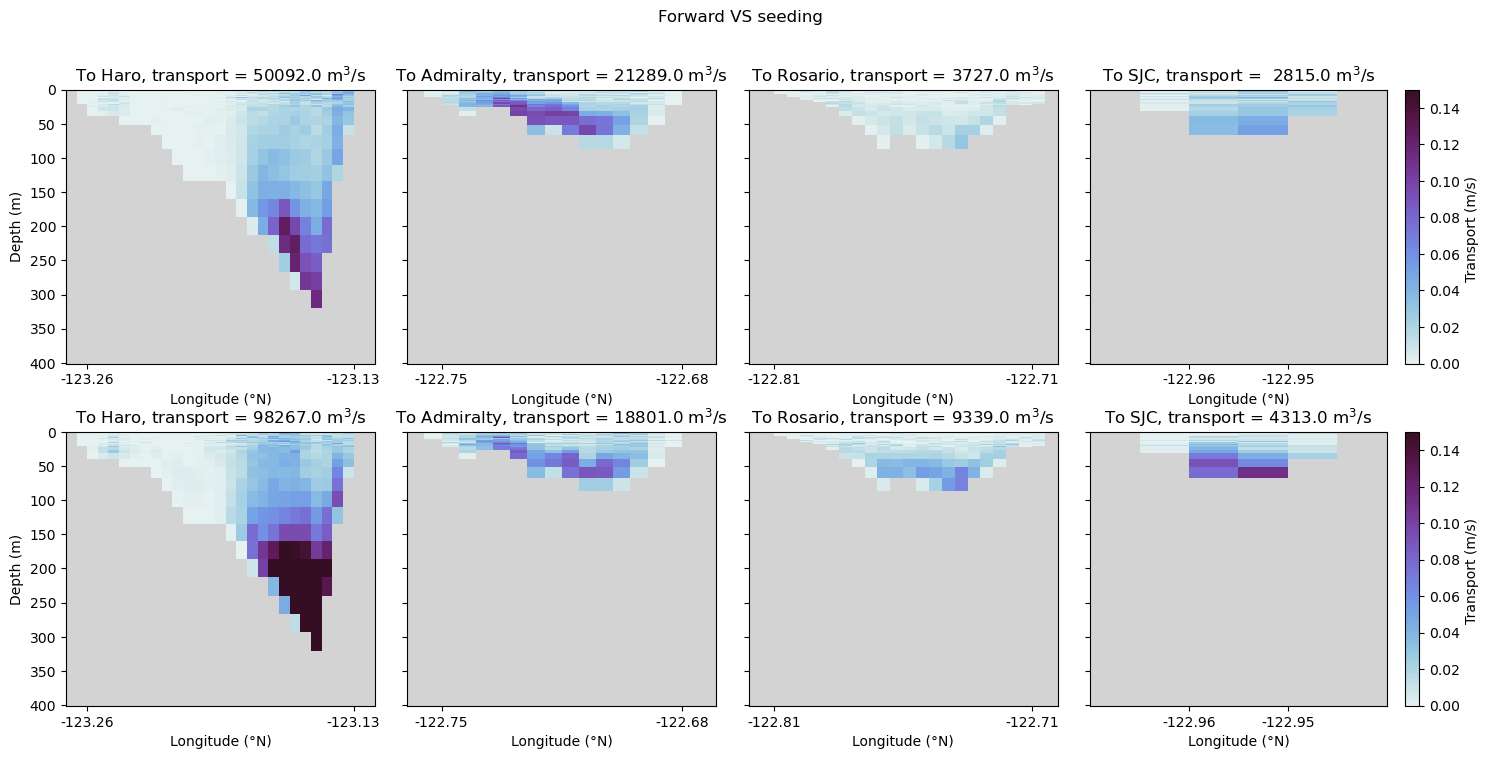

In [24]:
title = 'To Haro, transport = ' + str(np.round(np.sum(dict_all['vstoharo3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title2 = 'To Rosario, transport = ' + str(np.round(np.sum(dict_all['vstoros3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title3 = 'To SJC, transport =  ' + str(np.round(np.sum(dict_all['vstosjc3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title4 = 'To Admiralty, transport = ' + str(np.round(np.sum(dict_all['vstoadm3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'

title5 = 'To Haro, transport = ' + str(np.round(np.sum(dict_all['vstoharo3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title6 = 'To Rosario, transport = ' + str(np.round(np.sum(dict_all['vstoros3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title7 = 'To SJC, transport = ' + str(np.round(np.sum(dict_all['vstosjc3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title8 = 'To Admiralty, transport = ' + str(np.round(np.sum(dict_all['vstoadm3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'

fig,[[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8]] = plt.subplots(2,4,figsize=(18,8),gridspec_kw={'width_ratios':[1,1,1,1.2]})

plotCS(ax1,dict_all['vstoharo3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoharo3']['final_z'][months[idx_dec]].dropna(),dict_all['vstoharo3']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,0.15,23*days_month[idx_dec],title,False,True)
plotCS(ax3,dict_all['vstoros3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoros3']['final_z'][months[idx_dec]].dropna(),dict_all['vstoros3']['final_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.15,23*days_month[idx_dec],title2,False,False)
plotCS(ax4,dict_all['vstosjc3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstosjc3']['final_z'][months[idx_dec]].dropna(),dict_all['vstosjc3']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.15,23*days_month[idx_dec],title3,True,False)
plotCS(ax2,dict_all['vstoadm3']['final_lon'][months[idx_dec]].dropna(),dict_all['vstoadm3']['final_z'][months[idx_dec]].dropna(),dict_all['vstoadm3']['final_transp'][months[idx_dec]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_dec],title4,False,False)

plotCS(ax5,dict_all['vstoharo3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoharo3']['final_z'][months[idx_jun]].dropna(),dict_all['vstoharo3']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,0.15,23*days_month[idx_jun],title5,False,True)
plotCS(ax7,dict_all['vstoros3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoros3']['final_z'][months[idx_jun]].dropna(),dict_all['vstoros3']['final_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.15,23*days_month[idx_jun],title6,False,False)
plotCS(ax8,dict_all['vstosjc3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstosjc3']['final_z'][months[idx_jun]].dropna(),dict_all['vstosjc3']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.15,23*days_month[idx_jun],title7,True,False)
plotCS(ax6,dict_all['vstoadm3']['final_lon'][months[idx_jun]].dropna(),dict_all['vstoadm3']['final_z'][months[idx_jun]].dropna(),dict_all['vstoadm3']['final_transp'][months[idx_jun]].dropna(),lonWadm3,lonEadm3,latadm3,38,0.2,23*days_month[idx_jun],title8,False,False)

fig.subplots_adjust(wspace=0.1,hspace=0.25)
fig.suptitle('Forward VS seeding')

In [25]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/forVS_config3.png',bbox_inches='tight')

Text(0.5, 0.98, 'Backwards rosario seeding')

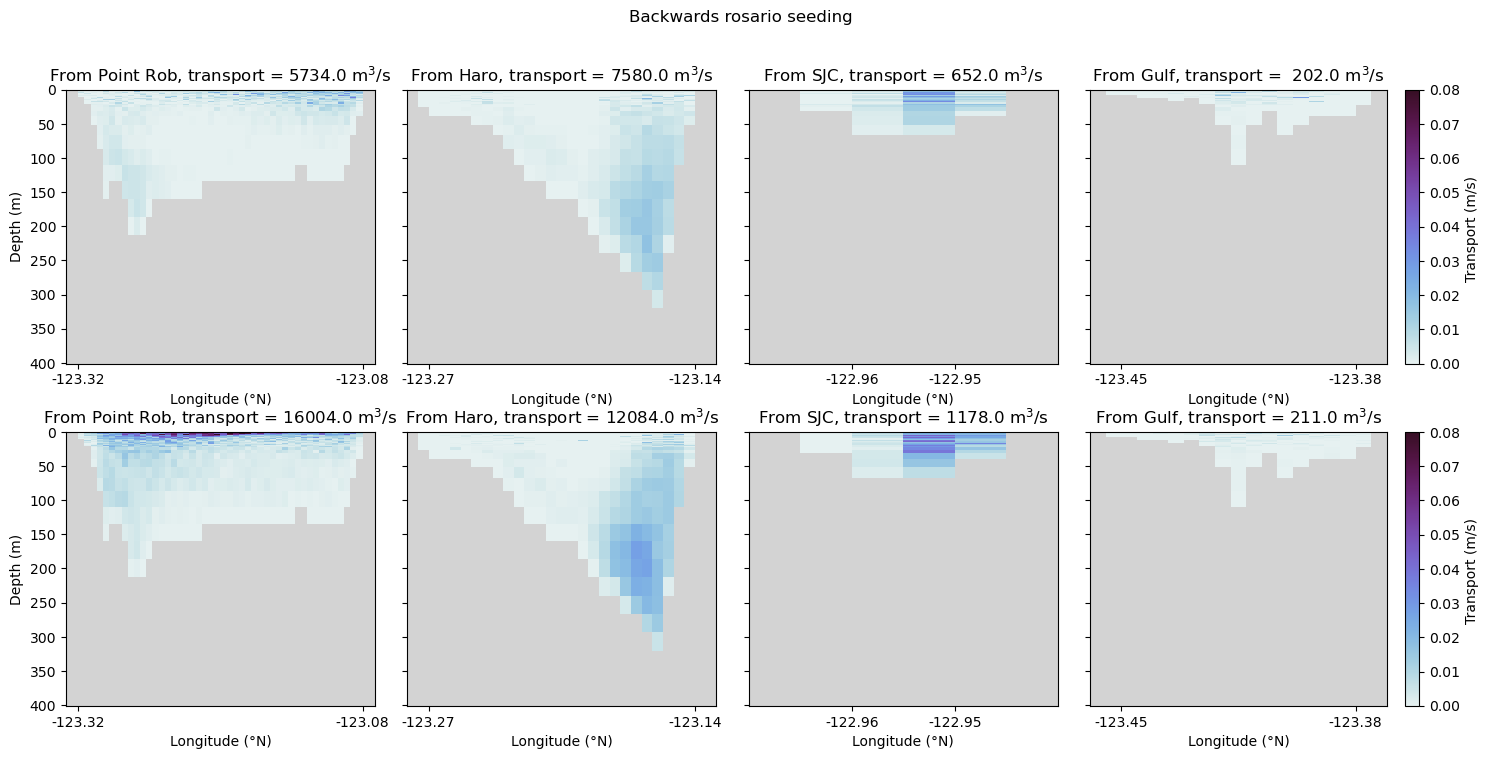

In [26]:
latharoB = 301

title = 'From Haro, transport = ' + str(np.round(np.sum(dict_all['harotoros']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title2 = 'From Point Rob, transport = ' + str(np.round(np.sum(dict_all['prtoros_RS']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title3 = 'From Gulf, transport =  ' + str(np.round(np.sum(dict_all['gulftoros']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title4 = 'From SJC, transport = ' + str(np.round(np.sum(dict_all['sjctoros']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'

title5 = 'From Haro, transport = ' + str(np.round(np.sum(dict_all['harotoros']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title6 = 'From Point Rob, transport = ' + str(np.round(np.sum(dict_all['prtoros_RS']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title7 = 'From Gulf, transport = ' + str(np.round(np.sum(dict_all['gulftoros']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title8 = 'From SJC, transport = ' + str(np.round(np.sum(dict_all['sjctoros']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'

fig,[[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8]] = plt.subplots(2,4,figsize=(18,8),gridspec_kw={'width_ratios':[1,1,1,1.2]})

plotCS(ax2,dict_all['harotoros']['final_lon'][months[idx_dec]].dropna(),dict_all['harotoros']['final_z'][months[idx_dec]].dropna(),dict_all['harotoros']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharoB,38,0.08,23*days_month[idx_dec],title,False,False)
plotCS(ax1,dict_all['prtoros_RS']['final_lon'][months[idx_dec]].dropna(),dict_all['prtoros_RS']['final_z'][months[idx_dec]].dropna(),dict_all['prtoros_RS']['final_transp'][months[idx_dec]].dropna(),lonWpr,lonEpr,latpr,38,0.08,23*days_month[idx_dec],title2,False,True)
plotCS(ax4,dict_all['gulftoros']['final_lon'][months[idx_dec]].dropna(),dict_all['gulftoros']['final_z'][months[idx_dec]].dropna(),dict_all['gulftoros']['final_transp'][months[idx_dec]].dropna(),lonWg1,lonEg1,latg1,38,0.08,23*days_month[idx_dec],title3,True,False)
plotCS(ax3,dict_all['sjctoros']['final_lon'][months[idx_dec]].dropna(),dict_all['sjctoros']['final_z'][months[idx_dec]].dropna(),dict_all['sjctoros']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.08,23*days_month[idx_dec],title4,False,False)

# plotCS2(ax2,dict_all['harotoros']['final_lon'][months[idx_jun]].dropna(),dict_all['harotoros']['final_z'][months[idx_jun]].dropna(),dict_all['harotoros']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharoB,38,0.08,23*days_month[idx_jun],title5,False,False)
plotCS(ax6,dict_all['harotoros']['final_lon'][months[idx_jun]].dropna(),dict_all['harotoros']['final_z'][months[idx_jun]].dropna(),dict_all['harotoros']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharoB,38,0.08,23*days_month[idx_jun],title5,False,False)
plotCS(ax5,dict_all['prtoros_RS']['final_lon'][months[idx_jun]].dropna(),dict_all['prtoros_RS']['final_z'][months[idx_jun]].dropna(),dict_all['prtoros_RS']['final_transp'][months[idx_jun]].dropna(),lonWpr,lonEpr,latpr,38,0.08,23*days_month[idx_jun],title6,False,True)
plotCS(ax8,dict_all['gulftoros']['final_lon'][months[idx_jun]].dropna(),dict_all['gulftoros']['final_z'][months[idx_jun]].dropna(),dict_all['gulftoros']['final_transp'][months[idx_jun]].dropna(),lonWg1,lonEg1,latg1,38,0.08,23*days_month[idx_jun],title7,True,False)
plotCS(ax7,dict_all['sjctoros']['final_lon'][months[idx_jun]].dropna(),dict_all['sjctoros']['final_z'][months[idx_jun]].dropna(),dict_all['sjctoros']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,0.08,23*days_month[idx_jun],title8,False,False)

fig.subplots_adjust(wspace=0.1,hspace=0.25)
plt.suptitle('Backwards rosario seeding')

In [27]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/backros_sjgi.png',bbox_inches='tight')

Very little from gulf to ros ... most of gulf goes out through Haro

Not much from SJC, much more goes to SJC in the south end of channels

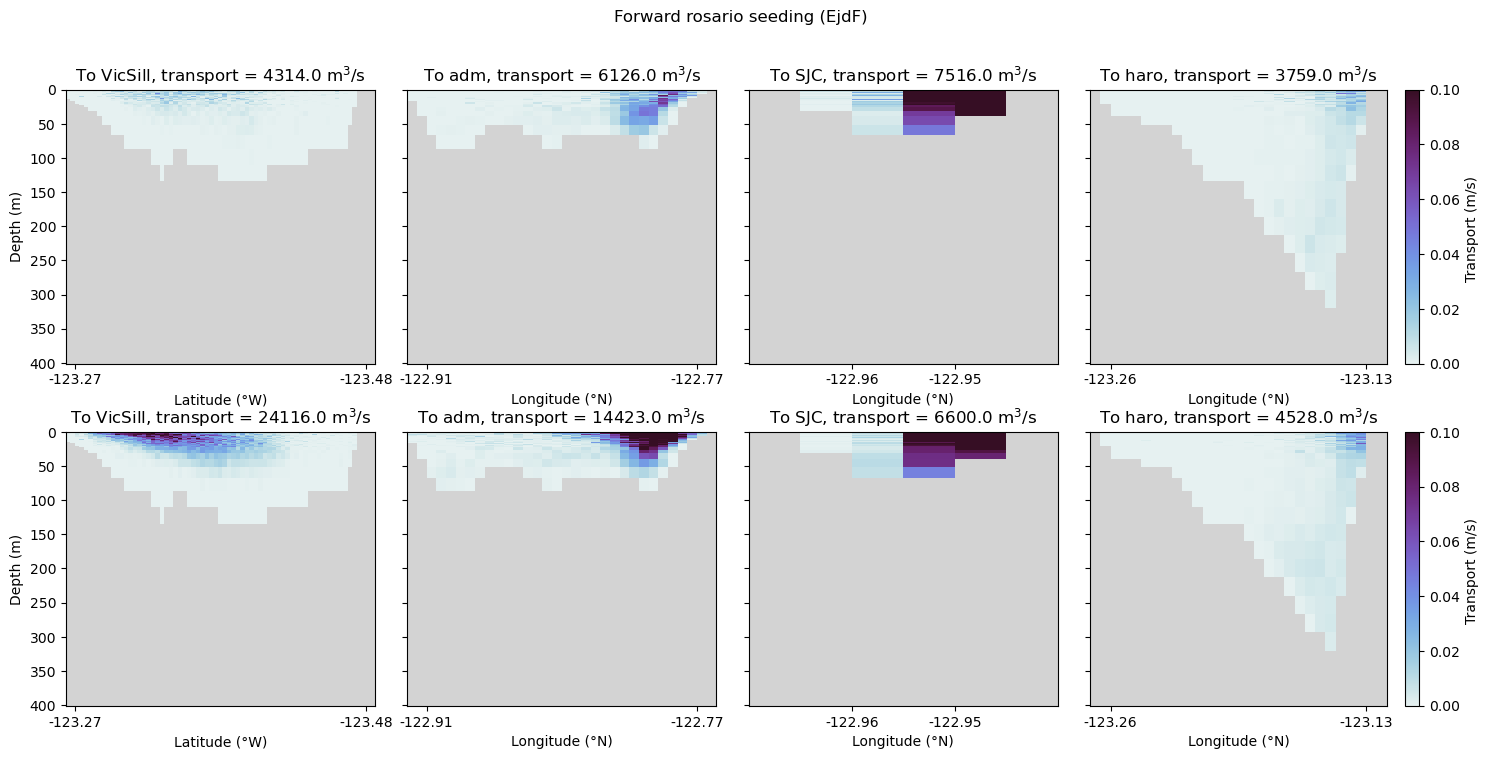

In [28]:
lonWvs = 235
lonEvs = 304
latvs = 178
vmax = 0.1

title = 'To VicSill, transport = ' + str(np.round(np.sum(dict_all['rostovs_RS']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title2 = 'To adm, transport = ' + str(np.round(np.sum(dict_all['rostoadm']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title3 = 'To haro, transport = ' + str(np.round(np.sum(dict_all['rostoharo']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title4 = 'To SJC, transport = ' + str(np.round(np.sum(dict_all['rostosjc']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'

title5 = 'To VicSill, transport = ' + str(np.round(np.sum(dict_all['rostovs_RS']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title6 = 'To adm, transport = ' + str(np.round(np.sum(dict_all['rostoadm']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title7 = 'To haro, transport = ' + str(np.round(np.sum(dict_all['rostoharo']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title8 = 'To SJC, transport = ' + str(np.round(np.sum(dict_all['rostosjc']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'

fig,[[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8]] = plt.subplots(2,4,figsize=(18,8),gridspec_kw={'width_ratios':[1,1,1,1.2]})

plotCS(ax1,dict_all['rostovs_RS']['final_lon'][months[idx_dec]].dropna(),dict_all['rostovs_RS']['final_z'][months[idx_dec]].dropna(),dict_all['rostovs_RS']['final_transp'][months[idx_dec]].dropna(),lonWvs,lonEvs,latvs,38,vmax,23*days_month[idx_dec],title,False,True,NW=True)
plotCS(ax2,dict_all['rostoadm']['final_lon'][months[idx_dec]].dropna(),dict_all['rostoadm']['final_z'][months[idx_dec]].dropna(),dict_all['rostoadm']['final_transp'][months[idx_dec]].dropna(),lonWadm,lonEadm,latadm,38,vmax,23*days_month[idx_dec],title2,False,False)
plotCS(ax4,dict_all['rostoharo']['final_lon'][months[idx_dec]].dropna(),dict_all['rostoharo']['final_z'][months[idx_dec]].dropna(),dict_all['rostoharo']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,vmax,23*days_month[idx_dec],title3,True,False)
plotCS(ax3,dict_all['rostosjc']['final_lon'][months[idx_dec]].dropna(),dict_all['rostosjc']['final_z'][months[idx_dec]].dropna(),dict_all['rostosjc']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,vmax,23*days_month[idx_dec],title4,False,False)

# plotCS2(ax8,dict_all['rostoharo']['final_lon'][months[idx_dec]].dropna(),dict_all['rostoharo']['final_z'][months[idx_dec]].dropna(),dict_all['rostoharo']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,vmax,23*days_month[idx_dec],title3,True,False)
plotCS(ax5,dict_all['rostovs_RS']['final_lon'][months[idx_jun]].dropna(),dict_all['rostovs_RS']['final_z'][months[idx_jun]].dropna(),dict_all['rostovs_RS']['final_transp'][months[idx_jun]].dropna(),lonWvs,lonEvs,latvs,38,vmax,23*days_month[idx_jun],title5,False,True,NW=True)
plotCS(ax6,dict_all['rostoadm']['final_lon'][months[idx_jun]].dropna(),dict_all['rostoadm']['final_z'][months[idx_jun]].dropna(),dict_all['rostoadm']['final_transp'][months[idx_jun]].dropna(),lonWadm,lonEadm,latadm,38,vmax,23*days_month[idx_jun],title6,False,False)
plotCS(ax8,dict_all['rostoharo']['final_lon'][months[idx_jun]].dropna(),dict_all['rostoharo']['final_z'][months[idx_jun]].dropna(),dict_all['rostoharo']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,vmax,23*days_month[idx_jun],title7,True,False)
# plotCS(ax7,dict_all['rostosjc']['final_lon'][months[idx_dec]].dropna(),dict_all['rostosjc']['final_z'][months[idx_dec]].dropna(),dict_all['rostosjc']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,vmax,23*days_month[idx_dec],title4,False,False)
plotCS(ax7,dict_all['rostosjc']['final_lon'][months[idx_jun]].dropna(),dict_all['rostosjc']['final_z'][months[idx_jun]].dropna(),dict_all['rostosjc']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,vmax,23*days_month[idx_jun],title8,False,False)

fig.suptitle('Forward rosario seeding (EjdF)')
fig.subplots_adjust(wspace=0.1,hspace=0.25)

### Config 3

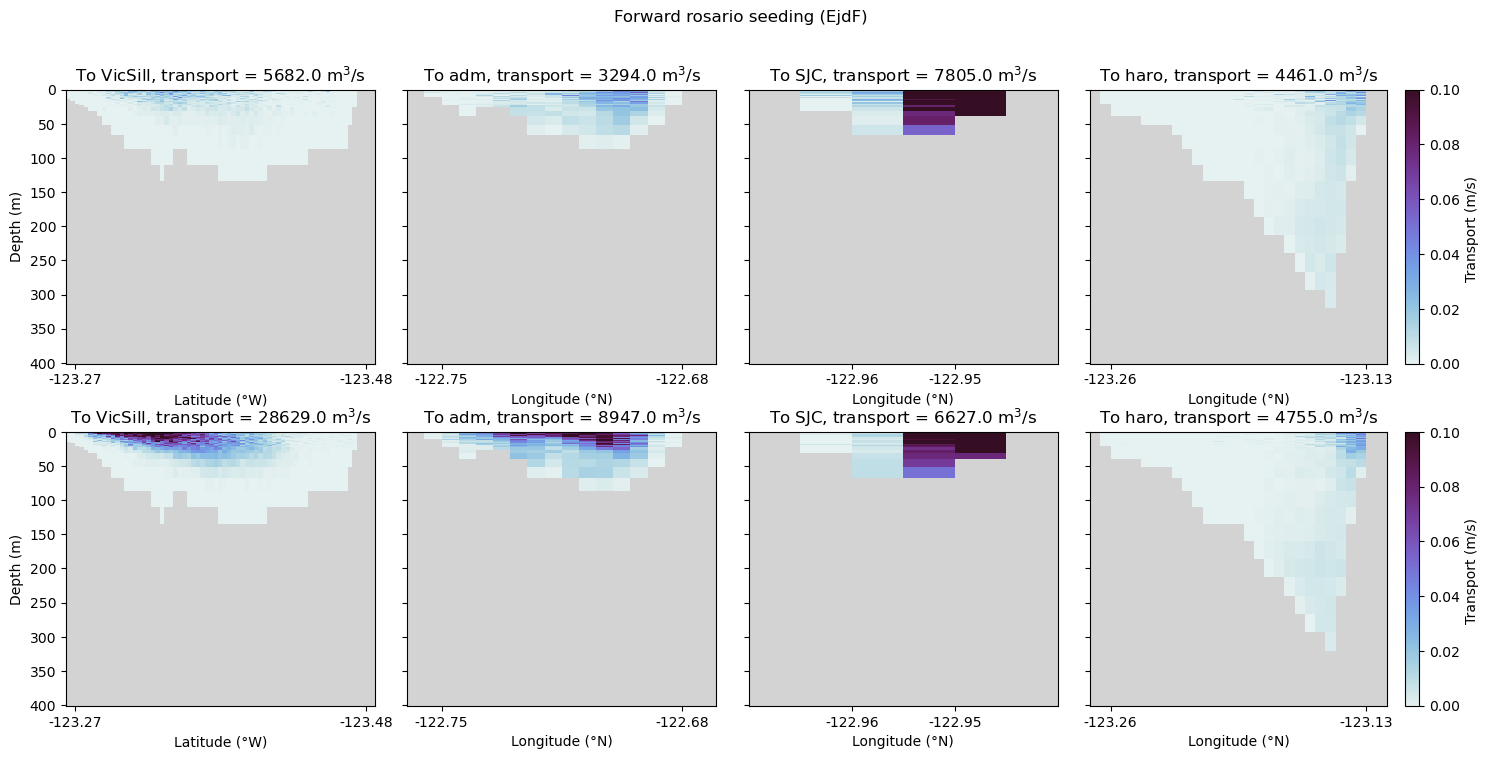

In [29]:
title = 'To VicSill, transport = ' + str(np.round(np.sum(dict_all['rostovs3_RS']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title2 = 'To adm, transport = ' + str(np.round(np.sum(dict_all['rostoadm3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title3 = 'To haro, transport = ' + str(np.round(np.sum(dict_all['rostoharo3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title4 = 'To SJC, transport = ' + str(np.round(np.sum(dict_all['rostosjc3']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'

title5 = 'To VicSill, transport = ' + str(np.round(np.sum(dict_all['rostovs3_RS']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title6 = 'To adm, transport = ' + str(np.round(np.sum(dict_all['rostoadm3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title7 = 'To haro, transport = ' + str(np.round(np.sum(dict_all['rostoharo3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title8 = 'To SJC, transport = ' + str(np.round(np.sum(dict_all['rostosjc3']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'

fig,[[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8]] = plt.subplots(2,4,figsize=(18,8),gridspec_kw={'width_ratios':[1,1,1,1.2]})

plotCS(ax1,dict_all['rostovs3_RS']['final_lon'][months[idx_dec]].dropna(),dict_all['rostovs3_RS']['final_z'][months[idx_dec]].dropna(),dict_all['rostovs3_RS']['final_transp'][months[idx_dec]].dropna(),lonWvs,lonEvs,latvs,38,vmax,23*days_month[idx_dec],title,False,True,NW=True)
plotCS(ax2,dict_all['rostoadm3']['final_lon'][months[idx_dec]].dropna(),dict_all['rostoadm3']['final_z'][months[idx_dec]].dropna(),dict_all['rostoadm3']['final_transp'][months[idx_dec]].dropna(),lonWadm3,lonEadm3,latadm3,38,vmax,23*days_month[idx_dec],title2,False,False)
plotCS(ax4,dict_all['rostoharo3']['final_lon'][months[idx_dec]].dropna(),dict_all['rostoharo3']['final_z'][months[idx_dec]].dropna(),dict_all['rostoharo3']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,vmax,23*days_month[idx_dec],title3,True,False)
plotCS(ax3,dict_all['rostosjc3']['final_lon'][months[idx_dec]].dropna(),dict_all['rostosjc3']['final_z'][months[idx_dec]].dropna(),dict_all['rostosjc3']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,vmax,23*days_month[idx_dec],title4,False,False)

# plotCS2(ax8,dict_all['rostoharo']['final_lon'][months[idx_dec]].dropna(),dict_all['rostoharo']['final_z'][months[idx_dec]].dropna(),dict_all['rostoharo']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharo,38,vmax,23*days_month[idx_dec],title3,True,False)
plotCS(ax5,dict_all['rostovs3_RS']['final_lon'][months[idx_jun]].dropna(),dict_all['rostovs3_RS']['final_z'][months[idx_jun]].dropna(),dict_all['rostovs3_RS']['final_transp'][months[idx_jun]].dropna(),lonWvs,lonEvs,latvs,38,vmax,23*days_month[idx_jun],title5,False,True,NW=True)
plotCS(ax6,dict_all['rostoadm3']['final_lon'][months[idx_jun]].dropna(),dict_all['rostoadm3']['final_z'][months[idx_jun]].dropna(),dict_all['rostoadm3']['final_transp'][months[idx_jun]].dropna(),lonWadm3,lonEadm3,latadm3,38,vmax,23*days_month[idx_jun],title6,False,False)
plotCS(ax8,dict_all['rostoharo3']['final_lon'][months[idx_jun]].dropna(),dict_all['rostoharo3']['final_z'][months[idx_jun]].dropna(),dict_all['rostoharo3']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharo,38,vmax,23*days_month[idx_jun],title7,True,False)
# plotCS(ax7,dict_all['rostosjc']['final_lon'][months[idx_dec]].dropna(),dict_all['rostosjc']['final_z'][months[idx_dec]].dropna(),dict_all['rostosjc']['final_transp'][months[idx_dec]].dropna(),lonWsjc,lonEsjc,latsjc,38,vmax,23*days_month[idx_dec],title4,False,False)
plotCS(ax7,dict_all['rostosjc3']['final_lon'][months[idx_jun]].dropna(),dict_all['rostosjc3']['final_z'][months[idx_jun]].dropna(),dict_all['rostosjc3']['final_transp'][months[idx_jun]].dropna(),lonWsjc,lonEsjc,latsjc,38,vmax,23*days_month[idx_jun],title8,False,False)

fig.suptitle('Forward rosario seeding (EjdF)')
fig.subplots_adjust(wspace=0.1,hspace=0.25)

#### Rosario, add map

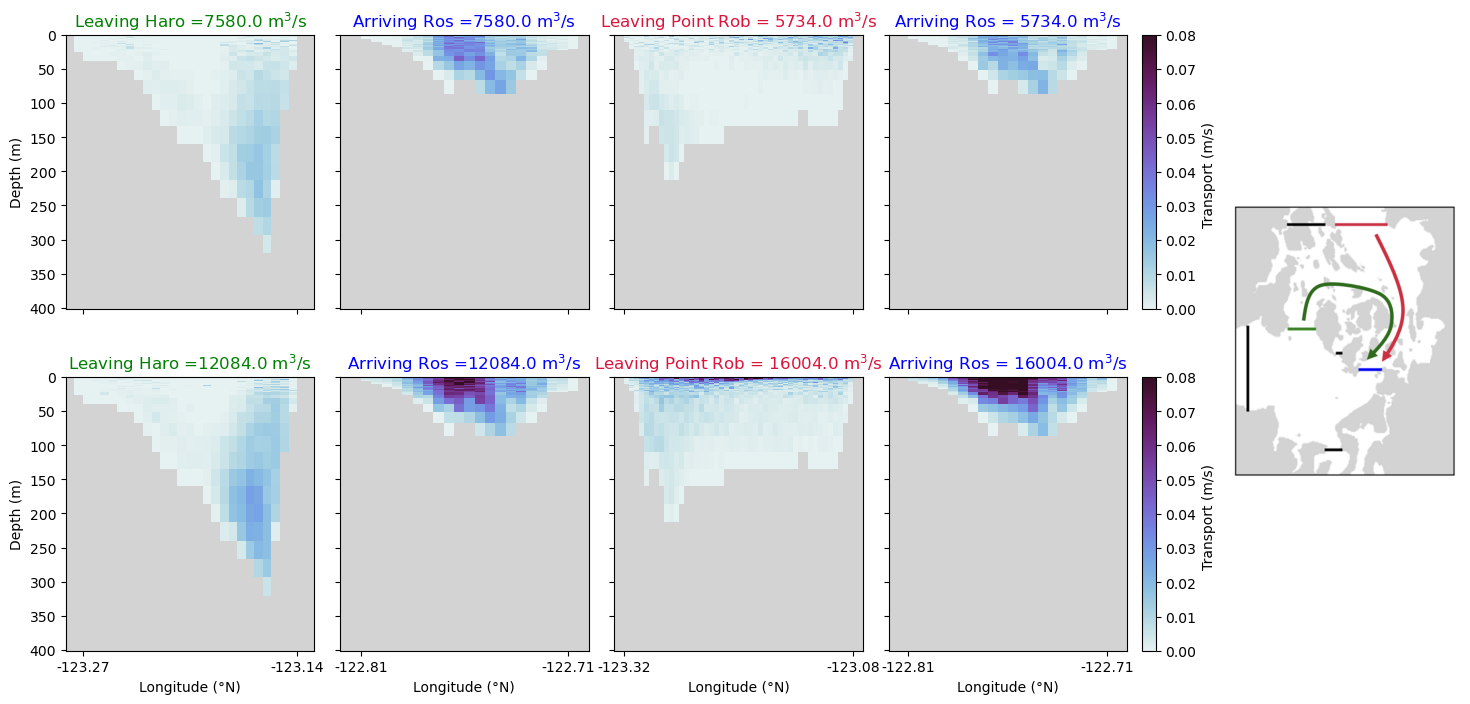

In [30]:
title = 'Leaving Haro =' + str(np.round(np.sum(dict_all['harotoros']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title2 = 'Arriving Ros =' + str(np.round(np.sum(dict_all['harotoros']['init_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title3 = 'Leaving Point Rob = ' + str(np.round(np.sum(dict_all['prtoros_RS']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
title4 = 'Arriving Ros = ' + str(np.round(np.sum(dict_all['prtoros_RS']['init_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'
# title4 = 'Arriving Ros = ' + str(np.round(np.sum(dict_all['sjctoros']['final_transp'][months[idx_dec]])/(23*days_month[idx_dec]))) + f' m$^3$/s'

title5 = 'Leaving Haro =' + str(np.round(np.sum(dict_all['harotoros']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title6 = 'Arriving Ros =' + str(np.round(np.sum(dict_all['harotoros']['init_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title7 = 'Leaving Point Rob = ' + str(np.round(np.sum(dict_all['prtoros_RS']['final_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'
title8 = 'Arriving Ros = ' + str(np.round(np.sum(dict_all['prtoros_RS']['init_transp'][months[idx_jun]])/(23*days_month[idx_jun]))) + f' m$^3$/s'

fig = plt.figure(figsize=(18, 8))
gs = fig.add_gridspec(2, 5, width_ratios=[1, 1, 1, 1.2, 1])

# Define subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[1, 2])
ax8 = fig.add_subplot(gs[1, 3])

ax_center1 = fig.add_subplot(gs[:, 4])
ax_center1.imshow(plt.imread('/ocean/cstang/MOAD/analysis-camryn/Figures/map_cs_bros.png'))
ax_center1.axis('off');

plotCS(ax1,dict_all['harotoros']['final_lon'][months[idx_dec]].dropna(),dict_all['harotoros']['final_z'][months[idx_dec]].dropna(),dict_all['harotoros']['final_transp'][months[idx_dec]].dropna(),lonWharo,lonEharo,latharoB,38,0.08,23*days_month[idx_dec],title,False,True)
plotCS(ax2,dict_all['harotoros']['init_lon'][months[idx_dec]].dropna(),dict_all['harotoros']['init_z'][months[idx_dec]].dropna(),dict_all['harotoros']['init_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.08,23*days_month[idx_dec],title2,False,False)
plotCS(ax3,dict_all['prtoros_RS']['final_lon'][months[idx_dec]].dropna(),dict_all['prtoros_RS']['final_z'][months[idx_dec]].dropna(),dict_all['prtoros_RS']['final_transp'][months[idx_dec]].dropna(),lonWpr,lonEpr,latpr,38,0.08,23*days_month[idx_dec],title3,False,False)
plotCS(ax4,dict_all['prtoros_RS']['init_lon'][months[idx_dec]].dropna(),dict_all['prtoros_RS']['init_z'][months[idx_dec]].dropna(),dict_all['prtoros_RS']['init_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.08,23*days_month[idx_dec],title4,True,False)
# plotCS(ax4,dict_all['prtoros']['final_lon'][months[idx_dec]].dropna(),dict_all['prtoros']['final_z'][months[idx_dec]].dropna(),dict_all['prtoros']['final_transp'][months[idx_dec]].dropna(),lonWros,lonEros,latros,38,0.08,23*days_month[idx_dec],title4,True,False)

# plotCS2(ax2,dict_all['harotoros']['final_lon'][months[idx_jun]].dropna(),dict_all['harotoros']['final_z'][months[idx_jun]].dropna(),dict_all['harotoros']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharoB,38,0.08,23*days_month[idx_jun],title5,False,False)
plotCS(ax5,dict_all['harotoros']['final_lon'][months[idx_jun]].dropna(),dict_all['harotoros']['final_z'][months[idx_jun]].dropna(),dict_all['harotoros']['final_transp'][months[idx_jun]].dropna(),lonWharo,lonEharo,latharoB,38,0.08,23*days_month[idx_jun],title5,False,True)
plotCS(ax6,dict_all['harotoros']['init_lon'][months[idx_jun]].dropna(),dict_all['harotoros']['init_z'][months[idx_jun]].dropna(),dict_all['harotoros']['init_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.08,23*days_month[idx_jun],title5,False,False)
plotCS(ax7,dict_all['prtoros_RS']['final_lon'][months[idx_jun]].dropna(),dict_all['prtoros_RS']['final_z'][months[idx_jun]].dropna(),dict_all['prtoros_RS']['final_transp'][months[idx_jun]].dropna(),lonWpr,lonEpr,latpr,38,0.08,23*days_month[idx_jun],title7,False,False)
plotCS(ax8,dict_all['prtoros_RS']['init_lon'][months[idx_jun]].dropna(),dict_all['prtoros_RS']['init_z'][months[idx_jun]].dropna(),dict_all['prtoros_RS']['init_transp'][months[idx_jun]].dropna(),lonWros,lonEros,latros,38,0.08,23*days_month[idx_jun],title8,True,False)

fig.subplots_adjust(wspace=0.1,hspace=0.25)
# plt.suptitle('Backwards rosario seeding')

ax1.set_title(title,color='green')
ax2.set_title(title2,color='b')
ax3.set_title(title3,color='crimson')
ax4.set_title(title4,color='b')
ax5.set_title(title5,color='green')
ax6.set_title(title6,color='b')
ax7.set_title(title7,color='crimson')
ax8.set_title(title8,color='b')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')
ax1.set_xticklabels('')
ax2.set_xticklabels('')
ax3.set_xticklabels('')
ax4.set_xticklabels('');

In [31]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/cs_ros_wmap.png',bbox_inches='tight')